In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import tensorflow as tf

In [2]:
# get data on efficacy of drugs against a target protein from chembl
def get_drug_data(target_protein, chembl_idx):
    # find chembl id of target protein
    chembl_result = pd.DataFrame.from_dict(new_client.target.search(target_protein))
    chembl_id = chembl_result["target_chembl_id"][chembl_idx]
    print("chembl_result: ", chembl_result)
    print("chembl_id: ", chembl_id)
    drug_data = new_client.activity.filter(target_chembl_id=chembl_id).filter(standard_type="IC50")
    return pd.DataFrame.from_dict(drug_data)

In [3]:
# HER2: breast cancer target protein
target_protein = "HER2"
drug_data_all_df = get_drug_data(target_protein, 1)

chembl_result:                                      cross_references           organism  \
0                                                 []       Homo sapiens   
1  [{'xref_id': 'P04626', 'xref_name': None, 'xre...       Homo sapiens   
2                                                 []       Homo sapiens   
3                                                 []       Homo sapiens   
4                                                 []       Homo sapiens   
5  [{'xref_id': 'P06494', 'xref_name': None, 'xre...  Rattus norvegicus   

                                           pref_name  score  \
0                                          FASN/HER2   17.0   
1            Receptor protein-tyrosine kinase erbB-2   15.0   
2  Epidermal growth factor receptor and ErbB2 (HE...   12.0   
3                          ErbB-2/ErbB-3 heterodimer   12.0   
4                   Epidermal growth factor receptor    9.0   
5            Receptor protein-tyrosine kinase erbB-2    6.0   

   species_group

In [4]:
# each row represents a different drug that was tested against the target_protein
drug_data_all_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.3
1,None,None,32266,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,None,32271,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.4
3,None,None,32273,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,1.21
4,None,None,47937,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24958832,[],CHEMBL5215095,Inhibition of HER2 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.12
4068,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24959145,[],CHEMBL5215236,Inhibition of HER2 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,29.2
4069,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24962762,[],CHEMBL5216230,Inhibition of Her2 in human MCF7 cells by SDS-...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,40.0
4070,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24962907,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216307,Inhibition of HER2 (unknown origin) incubated ...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,0.14


In [5]:
# standard_type column is the measurement type (represents drug's efficacy against target protein). 
# In this case, we use IC50, which is the half-maximal inhibitory concentration
drug_data_all_df['standard_type'].unique()

array(['IC50'], dtype=object)

In [6]:
# standard_value column is the actual measurement itself 
# tells the potency of the drug - the lower the value, the better the drug
# in order to elicit 50% inhibition of the target protein, you would need lower concentration of the drug
drug_data_all_df['standard_value']

0         300.0
1        2500.0
2         400.0
3        1210.0
4         100.0
         ...   
4067      120.0
4068       29.2
4069    40000.0
4070       0.14
4071       0.06
Name: standard_value, Length: 4072, dtype: object

In [7]:
drug_data_all_df['canonical_smiles']

0       Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1       Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
2       Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
3       Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
4       Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
                              ...                        
4067           C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1
4068    CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...
4069          CCCCn1c(Cc2cc(OC)c(OC)c(OC)c2)nc2c(N)ncnc21
4070           N#Cc1c(NC(=O)CNc2n[nH]c3ncccc23)sc2c1CCCC2
4071    Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...
Name: canonical_smiles, Length: 4072, dtype: object

In [8]:
print(pd.isna(drug_data_all_df.loc[1716, "canonical_smiles"]))

True


In [9]:
# some smiles strings are missing so drop those rows
drug_data_df = drug_data_all_df[["molecule_chembl_id", "canonical_smiles", "standard_value"]].copy()
print("Original dataset size: ", len(drug_data_df))
drug_data_df.dropna(inplace=True)
drug_data_df.reset_index(inplace=True)
print("Final dataset size: ", len(drug_data_df))

Original dataset size:  4072
Final dataset size:  3140


In [10]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import Descriptors
# from rdkit.Chem import DataStructs

In [11]:
# generate morgan fingerprints for each chemical (1D descriptor)
def gen_1d_desc(df):
    morgan_fp_length = 2048
    morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=morgan_fp_length)
    cols = ['mf_' + str(n) for n in range(morgan_fp_length)]
    morgan_df = pd.DataFrame(columns=cols)
    for idx in range(len(df)):
        print("idx: ", idx)
        print("chembl_id: ", df.loc[idx, 'molecule_chembl_id'])
        print("smiles: ", df.loc[idx, 'canonical_smiles'])
        molecule = Chem.MolFromSmiles(df.loc[idx, 'canonical_smiles'])
        morgan_fp = morgan_gen.GetFingerprint(molecule)
        ## print(morgan_fp)
        feature_vec = np.array(morgan_fp)
        feature_vec = np.asarray(feature_vec).astype('float32')
        morgan_df.loc[len(morgan_df)] = feature_vec
        print(sum(feature_vec))
    return morgan_df

In [12]:
# generate molecular weight and atomic counts for each chemical (0D descriptor)
def gen_0d_desc(df):
    cols = ['molwt']
    min_atomic_num = 1 # hydrogen
    max_atomic_num = 118 # Oganesson
    cols = cols + ["atmct_" + str(atom) for atom in range(min_atomic_num, max_atomic_num+1)]
    zerod_df = pd.DataFrame(columns=cols)
    
    for idx in range(len(df)):
        print("idx: ", idx)
        print("chembl_id: ", df.loc[idx, 'molecule_chembl_id'])
        print("smiles: ", df.loc[idx, 'canonical_smiles'])
        
        molecule = Chem.MolFromSmiles(df.loc[idx, 'canonical_smiles'])
        molecule_weight = Descriptors.MolWt(molecule)
        # molecular weight
        print("molwt: ", molecule_weight)
        zerod_df.loc[idx, 'molwt'] = float(molecule_weight)
        
        molecule_H = Chem.AddHs(molecule)
        # atom counts
        # initialize all counts to 0
        for atomic_num in range(min_atomic_num, max_atomic_num+1):
            zerod_df.loc[idx, 'atmct_' + str(atomic_num)] = 0.0
            
        for atom in molecule_H.GetAtoms():
            atomic_num = atom.GetAtomicNum()
            # print(atomic_num)
            zerod_df.loc[idx, 'atmct_' + str(atomic_num)] += 1.0
    return zerod_df

In [41]:
# generate features (0d or 1d descriptors)
def gen_features(zerod = True, oned = True):
    zerod_df = None
    oned_df = None
    chemblid_df = drug_data_df['molecule_chembl_id']
    
    if zerod:
        zerod_df = gen_0d_desc(drug_data_df)
    
    if oned:
        oned_df = gen_1d_desc(drug_data_df)
    
    if (zerod and oned):
        features_df = pd.concat([chemblid_df, zerod_df, oned_df], axis=1)
    elif (zerod):
        features_df = zerod_df
    else:
        features_df = oned_df
        
    print("Features: ", features_df.columns)
    return features_df.astype('float32')

In [14]:
def gen_pIC50_target(df):
    print("IC50 range: ", df['standard_value'].min(), " - ", df['standard_value'].max())
    # convert IC50 to pIC50
    pIC50 = []
    for val in df['standard_value']:
        # convert nanomolar to molar
        molar = float(val)*(10**-9)
        pIC50.append(-np.log10(molar))
        
    df['pIC50'] = pIC50
    print("pIC50 range: ", df['pIC50'].min(), " - ", df['pIC50'].max())
    return df['pIC50']

In [15]:
from sklearn.model_selection import train_test_split

In [42]:
# Uses 0D descriptors (atomic counts, molecular weight) and 1D descriptor (Morgan fingerprint) as features
X = gen_features()

idx:  0
chembl_id:  CHEMBL68920
smiles:  Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1
molwt:  383.814
idx:  1
chembl_id:  CHEMBL68920
smiles:  Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1
molwt:  383.814
idx:  2
chembl_id:  CHEMBL69960
smiles:  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21
molwt:  482.9030000000001
idx:  3
chembl_id:  CHEMBL69960
smiles:  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21
molwt:  482.9030000000001
idx:  4
chembl_id:  CHEMBL67057
smiles:  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc4c(ccn4Cc4ccccc4)c3)c21
molwt:  559.6300000000002
idx:  5
chembl_id:  CHEMBL65848
smiles:  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc4c(c3)CCC4)c21
molwt:  470.53300000000024
idx:  6
chembl_id:  CHEMBL65848
smiles:  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc4c(c3)CCC4)c21
molwt:  470.53300000000024
idx:  7
chembl_id:  CHEMBL69629
smiles:  Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)

idx:  215
chembl_id:  CHEMBL31656
smiles:  C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1
molwt:  486.9350000000004
idx:  216
chembl_id:  CHEMBL31419
smiles:  C=CC(=O)Nc1cc2c(Nc3cccc(Br)c3)ncnc2cc1OCCCN1CCOCC1
molwt:  512.4080000000004
idx:  217
chembl_id:  CHEMBL31815
smiles:  C=CC(=O)Nc1ccc2ncnc(Nc3cccc(C)c3)c2c1
molwt:  304.35300000000007
idx:  218
chembl_id:  CHEMBL280757
smiles:  C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Br)c3)c2c1
molwt:  387.21200000000005
idx:  219
chembl_id:  CHEMBL28418
smiles:  C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2n1
molwt:  343.749
idx:  220
chembl_id:  CHEMBL281543
smiles:  C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1CCCCN1CCOCC1
molwt:  484.9630000000004
idx:  221
chembl_id:  CHEMBL284326
smiles:  C=CC(=O)Nc1nc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCN(C)CC1
molwt:  499.9780000000004
idx:  222
chembl_id:  CHEMBL85021
smiles:  CC(C)c1cc(/C=C2\C(=O)Nc3ccccc32)cc(C(C)C)c1O
molwt:  321.4200000000001
idx:  223
chembl_id:  CHEMBL85403
smiles:  Cc1cccc2c1/C(=C/c1ccc[nH]1)

idx:  310
chembl_id:  CHEMBL91925
smiles:  CCN(CC)C/C=C/C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  454.3720000000001
idx:  311
chembl_id:  CHEMBL316127
smiles:  O=C(/C=C/CN1CCOCC1)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  468.35500000000013
idx:  312
chembl_id:  CHEMBL91748
smiles:  CN(C)/C=C/C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  412.29100000000005
idx:  313
chembl_id:  CHEMBL91009
smiles:  COCC#CC(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  411.25900000000007
idx:  314
chembl_id:  CHEMBL92086
smiles:  C=C(C)C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  383.249
idx:  315
chembl_id:  CHEMBL2112369
smiles:  COC[C@@H]1CCCN1C/C=C\C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  496.40900000000016
idx:  316
chembl_id:  CHEMBL90595
smiles:  O=C(C#CCN1CCCCC1)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  464.36700000000013
idx:  317
chembl_id:  CHEMBL419501
smiles:  COC[C@H]1CCCN1C/C=C/C(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  496.40900000000016
idx:  318
chembl_id:  CHEMBL91811
smiles:  CC(C)N(C)CC#CC(

idx:  482
chembl_id:  CHEMBL193368
smiles:  CCc1c(C(=O)OCCCn2ccnc2)cn2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c12
molwt:  520.5970000000002
idx:  483
chembl_id:  CHEMBL193368
smiles:  CCc1c(C(=O)OCCCn2ccnc2)cn2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c12
molwt:  520.5970000000002
idx:  484
chembl_id:  CHEMBL412367
smiles:  CCc1c(NC(=O)OCCn2ccnc2)cn2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c12
molwt:  521.5850000000003
idx:  485
chembl_id:  CHEMBL412367
smiles:  CCc1c(NC(=O)OCCn2ccnc2)cn2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c12
molwt:  521.5850000000003
idx:  486
chembl_id:  CHEMBL412367
smiles:  CCc1c(NC(=O)OCCn2ccnc2)cn2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c12
molwt:  521.5850000000003
idx:  487
chembl_id:  CHEMBL371888
smiles:  COc1cc2ncnc(Nc3ccc(OCc4ccccn4)c(C)c3)c2cc1OC
molwt:  402.4540000000002
idx:  488
chembl_id:  CHEMBL444619
smiles:  COc1cc(ON2CCC(C)CC2)c2c(Nc3ccc(OCc4ccccn4)c(Cl)c3)ncnc2c1
molwt:  506.00600000000026
idx:  489
chembl_id:  CHEMBL197640
smiles:  CN1CCC(Oc2cccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c23)CC1


idx:  606
chembl_id:  CHEMBL210444
smiles:  O=C(NCCCl)Nc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1
molwt:  376.2470000000001
idx:  607
chembl_id:  CHEMBL208240
smiles:  Cc1cccc(Nc2ncnc3ccc(NC(=O)NCCCl)cc23)c1
molwt:  355.8290000000001
idx:  608
chembl_id:  CHEMBL50344
smiles:  CNc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  329.2010000000001
idx:  609
chembl_id:  CHEMBL209343
smiles:  CNc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1
molwt:  284.75000000000006
idx:  610
chembl_id:  CHEMBL208594
smiles:  CNc1ccc2ncnc(Nc3cccc(C)c3)c2c1
molwt:  264.332
idx:  611
chembl_id:  CHEMBL52765
smiles:  Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
molwt:  315.17400000000004
idx:  612
chembl_id:  CHEMBL343352
smiles:  Nc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1
molwt:  270.72300000000007
idx:  613
chembl_id:  CHEMBL208433
smiles:  CC1(C)CC2=Nc3ccccc3NC(c3cccc(O)c3O)C2=C(O)C1
molwt:  350.4180000000001
idx:  614
chembl_id:  CHEMBL209511
smiles:  O=S(=O)(Nc1ccc(Cl)cc1O)c1ccccc1
molwt:  283.736
idx:  615
chembl_id:  CHEMBL210638
smiles:  COc1cc(C2CC(c3ccccc3O)=NN2)ccc

idx:  723
chembl_id:  CHEMBL388483
smiles:  Cc1cc(Nc2ncnc3ccc(OCCCN4CCOCC4)cc23)ccc1OC1CCN(C(=O)Nc2c(F)cccc2F)CC1
molwt:  632.7120000000003
idx:  724
chembl_id:  CHEMBL231205
smiles:  COCCOc1ccc2ncnc(Nc3ccc(OC4CCN(C(=O)Nc5c(F)cccc5F)CC4)c(C)c3)c2c1
molwt:  563.6050000000002
idx:  725
chembl_id:  CHEMBL231204
smiles:  COc1ccc2ncnc(Nc3ccc(OC4CCN(C(=O)Nc5c(F)cccc5F)CC4)c(C)c3)c2c1
molwt:  519.5520000000004
idx:  726
chembl_id:  CHEMBL231099
smiles:  COCCOc1cc2ncnc(Nc3ccc(OC4CCN(C(=O)Nc5c(F)cccc5F)CC4)c(C)c3)c2cc1OCCOC
molwt:  637.6840000000001
idx:  727
chembl_id:  CHEMBL231101
smiles:  COc1cc2ncnc(Nc3ccc(OC4CCN(C(=O)Nc5c(F)cccc5F)CC4)c(C)c3)c2cc1OC
molwt:  549.5780000000002
idx:  728
chembl_id:  CHEMBL411192
smiles:  Cc1cc(Nc2ncnc3cnc(N4CCOCC4)cc23)ccc1OC1CCN(C(=O)CC(C)(C)C)CC1
molwt:  518.6620000000004
idx:  729
chembl_id:  CHEMBL231100
smiles:  Cc1cc(Nc2ncnc3cnc(N(C)C)cc23)ccc1OC1CCN(C(=O)CC(C)(C)C)CC1
molwt:  476.62500000000045
idx:  730
chembl_id:  CHEMBL230255
smiles:  Cc1cc(Nc2ncnc

idx:  792
chembl_id:  CHEMBL246073
smiles:  Fc1cccc(Cn2ncc3cc(Nc4ncnn5ccc(COC[C@H]6CCCNC6)c45)ccc32)c1
molwt:  485.5670000000004
idx:  793
chembl_id:  CHEMBL246072
smiles:  Fc1cccc(Cn2ncc3cc(Nc4ncnn5ccc(COCC6CCNCC6)c45)ccc32)c1
molwt:  485.5670000000004
idx:  794
chembl_id:  CHEMBL245869
smiles:  Fc1cccc(Cn2ncc3cc(Nc4ncnn5ccc(COC6CCNCC6)c45)ccc32)c1
molwt:  471.54000000000036
idx:  795
chembl_id:  CHEMBL245868
smiles:  CN(C)CCCOCc1ccn2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c12
molwt:  473.5560000000002
idx:  796
chembl_id:  CHEMBL245867
smiles:  NCCCCOCc1ccn2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c12
molwt:  459.5290000000002
idx:  797
chembl_id:  CHEMBL245667
smiles:  NCCCOCc1ccn2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c12
molwt:  445.5020000000002
idx:  798
chembl_id:  CHEMBL394333
smiles:  NCCOCc1ccn2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c12
molwt:  431.47500000000014
idx:  799
chembl_id:  CHEMBL246694
smiles:  NC(=O)COCc1ccn2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c12
molwt:  445.4580000000002
idx:  800
che

idx:  895
chembl_id:  CHEMBL253881
smiles:  NC1CCN(Cc2ccn3ncnc(Oc4ccc(NC(=O)NC(=O)Cc5ccc(F)cc5)cc4F)c23)CC1
molwt:  535.5550000000001
idx:  896
chembl_id:  CHEMBL256362
smiles:  Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)N(C)C)c34)cc2C)cn1
molwt:  457.5340000000003
idx:  897
chembl_id:  CHEMBL404181
smiles:  C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12)C(=O)N1CCOCC1
molwt:  515.5990000000003
idx:  898
chembl_id:  CHEMBL257411
smiles:  C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12)C(=O)N1CCOCC1
molwt:  515.5990000000003
idx:  899
chembl_id:  CHEMBL257410
smiles:  CNC(=O)[C@@H](C)Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12
molwt:  459.5350000000002
idx:  900
chembl_id:  CHEMBL257198
smiles:  C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12)C(=O)N(C)C
molwt:  473.56200000000024
idx:  901
chembl_id:  CHEMBL257197
smiles:  C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12)C(=O)N(C)C
molwt:  473.56200000000024
idx:  902
chembl_id:  CHEMBL404327
smiles:  C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4

idx:  964
chembl_id:  CHEMBL411897
smiles:  COC1CCN(CCOc2n[nH]c3ncnc(Nc4ccc(OCc5ccccn5)c(Cl)c4)c23)CC1
molwt:  509.99800000000033
idx:  965
chembl_id:  CHEMBL270448
smiles:  Clc1cc(Nc2ncnc3[nH]nc(OCCN4CCCCCO4)c23)ccc1OCc1ccccn1
molwt:  495.9710000000004
idx:  966
chembl_id:  CHEMBL257430
smiles:  Clc1cc(Nc2ncnc3[nH]nc(OCCN4CCNCC4)c23)ccc1OCc1ccccn1
molwt:  480.9600000000003
idx:  967
chembl_id:  CHEMBL402553
smiles:  Clc1cc(Nc2ncnc3[nH]nc(OCCN4CCCC4)c23)ccc1OCc1ccccn1
molwt:  465.94500000000033
idx:  968
chembl_id:  CHEMBL258270
smiles:  CC(=O)N1CCN(CCOc2n[nH]c3ncnc(Nc4ccc(OCc5ccccn5)c(Cl)c4)c23)CC1
molwt:  522.9970000000003
idx:  969
chembl_id:  CHEMBL258282
smiles:  CN1CCN(CCOc2n[nH]c3ncnc(Nc4ccc(OCc5ccccn5)c(Cl)c4)c23)CC1
molwt:  494.98700000000025
idx:  970
chembl_id:  CHEMBL255135
smiles:  CNCCOc1n[nH]c2ncnc(Nc3ccc(OCc4ccccn4)c(Cl)c3)c12
molwt:  425.88000000000017
idx:  971
chembl_id:  CHEMBL401713
smiles:  COc1cc(Nc2ncnc3[nH]nc(OCCN4CCC(O)CC4)c23)ccc1OCc1ccccn1
molwt:  491.552000

idx:  1033
chembl_id:  CHEMBL461869
smiles:  CCNC(=O)O[C@@H]1CN[C@@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1
molwt:  566.0580000000001
idx:  1034
chembl_id:  CHEMBL466412
smiles:  CN(C)C(=O)O[C@@H]1CN[C@@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1
molwt:  566.0580000000001
idx:  1035
chembl_id:  CHEMBL450109
smiles:  O=C(O[C@@H]1CN[C@@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1)N1CCOCC1
molwt:  608.0949999999999
idx:  1036
chembl_id:  CHEMBL466614
smiles:  CCNC(=O)O[C@@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1
molwt:  566.0580000000001
idx:  1037
chembl_id:  CHEMBL466615
smiles:  CN(C)C(=O)O[C@@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1
molwt:  566.0580000000001
idx:  1038
chembl_id:  CHEMBL447365
smiles:  O=C(O[C@@H]1CN[C@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3s2)C1)N1CCOCC1
molwt:  608.0949999999999
idx:  1039
chembl_id:  CHEMBL466174
smiles:  CCNC(=O)O[C@H]1CN[C@@H](C#Cc2cc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3

idx:  1111
chembl_id:  CHEMBL248877
smiles:  Nc1ncnc2c1c(-c1ccc3nc(Cc4cccs4)[nH]c3c1)nn2[C@H]1CC[C@H](N2CCOCC2)CC1
molwt:  514.6590000000003
idx:  1112
chembl_id:  CHEMBL251732
smiles:  Nc1ncnc2c1c(-c1ccc3nc(Cc4ccccc4Cl)[nH]c3c1)nn2[C@H]1CC[C@H](N2CCOCC2)CC1
molwt:  543.075
idx:  1113
chembl_id:  CHEMBL437584
smiles:  COc1ccccc1Cc1nc2ccc(-c3nn([C@H]4CC[C@H](N5CCOCC5)CC4)c4ncnc(N)c34)cc2[nH]1
molwt:  538.6560000000005
idx:  1114
chembl_id:  CHEMBL455208
smiles:  COc1ccccc1Cc1nc2ccc(-c3nn([C@H]4CC[C@H](N5CCNCC5)CC4)c4ncnc(N)c34)cc2[nH]1
molwt:  537.6720000000005
idx:  1115
chembl_id:  CHEMBL452717
smiles:  COc1ccccc1Cc1nc2ccc(-c3nn([C@H]4CC[C@H](N5CCN(C(C)=O)CC5)CC4)c4ncnc(N)c34)cc2[nH]1
molwt:  579.7090000000004
idx:  1116
chembl_id:  CHEMBL503638
smiles:  CCOC(=O)N1CCN([C@H]2CC[C@H](n3nc(-c4ccc5nc(Cc6ccccc6OC)[nH]c5c4)c4c(N)ncnc43)CC2)CC1
molwt:  609.7349999999999
idx:  1117
chembl_id:  CHEMBL448628
smiles:  COc1ccccc1Cc1nc2ccc(-c3nn([C@H]4CC[C@H](N5CCN(C(=O)N(C)C)CC5)CC4)c4ncnc(N)c34)

idx:  1205
chembl_id:  CHEMBL525725
smiles:  COc1ccc(/N=C/c2c(N)ncnc2Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)cc1
molwt:  467.5080000000002
idx:  1206
chembl_id:  CHEMBL497863
smiles:  Nc1ncnc(Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)c1/C=N/NCC(F)(F)F
molwt:  458.42300000000006
idx:  1207
chembl_id:  CHEMBL497697
smiles:  CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1
molwt:  390.4260000000001
idx:  1208
chembl_id:  CHEMBL525725
smiles:  COc1ccc(/N=C/c2c(N)ncnc2Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)cc1
molwt:  467.5080000000002
idx:  1209
chembl_id:  CHEMBL497863
smiles:  Nc1ncnc(Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)c1/C=N/NCC(F)(F)F
molwt:  458.42300000000006
idx:  1210
chembl_id:  CHEMBL497697
smiles:  CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1
molwt:  390.4260000000001
idx:  1211
chembl_id:  CHEMBL515664
smiles:  COC[C@H]1CCCN1/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1
molwt:  474.5440000000002
idx:  1212
chembl_id:  CHEMBL456758
smiles:  COC[C@@H]1CCCN1/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1
molwt:  474.5440000

idx:  1308
chembl_id:  CHEMBL606466
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)c(O)c3)ncnc2cc1OCCCN1CCN(C)CC1
molwt:  556.6920000000001
idx:  1309
chembl_id:  CHEMBL593860
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)c(OC)c3)ncnc2cc1OCCCN1CCN(C)CC1
molwt:  570.7190000000002
idx:  1310
chembl_id:  CHEMBL593987
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)c(F)c3)ncnc2cc1OCCCN1CCN(C)CC1
molwt:  558.6830000000001
idx:  1311
chembl_id:  CHEMBL593274
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)c(Cl)c3)ncnc2cc1OCCCN1CCN(C)CC1
molwt:  575.138
idx:  1312
chembl_id:  CHEMBL593306
smiles:  COc1ccc2nc(-c3ccc(Nc4ncnc5cc(OCCCN6CCN(C)CC6)c(OC)cc45)cc3)sc2c1
molwt:  570.7190000000005
idx:  1313
chembl_id:  CHEMBL604992
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccc(F)cc5s4)cc3)ncnc2cc1OCCCN1CCN(C)CC1
molwt:  558.6830000000001
idx:  1314
chembl_id:  CHEMBL593275
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccc(Cl)cc5s4)cc3)ncnc2cc1OCCCN1CCN(C)CC1
molwt:  575.138
idx:  1315
chembl_id:  CHEMBL596292
smiles:  COc1cc2c(Nc3ccc(-c4nc5cc(Cl)ccc5s4)cc3

idx:  1388
chembl_id:  CHEMBL589822
smiles:  O=C1CSC(N/N=C/c2ccc(F)cc2)=N1
molwt:  237.25900000000001
idx:  1389
chembl_id:  CHEMBL592481
smiles:  O=C1CSC(N/N=C/c2cc(Cl)cc(Cl)c2O)=N1
molwt:  304.1580000000001
idx:  1390
chembl_id:  CHEMBL592707
smiles:  Cc1ccc(/C=N/NC2=NC(=O)CS2)cc1
molwt:  233.296
idx:  1391
chembl_id:  CHEMBL590876
smiles:  O=C1CSC(N/N=C/c2ccc(O)cc2)=N1
molwt:  235.26800000000003
idx:  1392
chembl_id:  CHEMBL604671
smiles:  O=C1CSC(N/N=C/c2ccc([N+](=O)[O-])cc2)=N1
molwt:  264.266
idx:  1393
chembl_id:  CHEMBL592708
smiles:  COc1ccc(/C=N/NC2=NC(=O)CS2)cc1
molwt:  249.295
idx:  1394
chembl_id:  CHEMBL590524
smiles:  O=C1CSC(N/N=C/c2cccc(Br)c2)=N1
molwt:  298.165
idx:  1395
chembl_id:  CHEMBL592139
smiles:  O=C1CSC(N/N=C/c2cccc(Cl)c2)=N1
molwt:  253.71400000000003
idx:  1396
chembl_id:  CHEMBL590877
smiles:  O=C1CSC(N/N=C/c2cccc(F)c2)=N1
molwt:  237.25900000000001
idx:  1397
chembl_id:  CHEMBL591051
smiles:  O=C1CSC(N/N=C/c2cccc(O)c2)=N1
molwt:  235.26800000000003
idx: 

idx:  1481
chembl_id:  CHEMBL1090360
smiles:  O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3cccc(N4CCOCC4)c3)n2)c1
molwt:  587.7090000000001
idx:  1482
chembl_id:  CHEMBL1090361
smiles:  CN1CCc2cc(Nc3nccc(-c4c(-c5cccc(NC(=O)Cc6ccccc6)c5)nc5sccn45)n3)ccc2C1
molwt:  571.71
idx:  1483
chembl_id:  CHEMBL1090362
smiles:  CCN1CCN(c2ccc(Nc3nccc(-c4c(-c5cccc(NC(=O)Cc6ccccc6)c5)nc5sccn45)n3)cc2)CC1
molwt:  614.779
idx:  1484
chembl_id:  CHEMBL1090363
smiles:  CN(C)CCc1cccc(Nc2nccc(-c3c(-c4cccc(NC(=O)Cc5ccccc5)c4)nc4sccn34)n2)c1
molwt:  573.7260000000001
idx:  1485
chembl_id:  CHEMBL1090364
smiles:  O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3ccc4c(c3)CCNC4)n2)c1
molwt:  557.6830000000001
idx:  1486
chembl_id:  CHEMBL1090357
smiles:  CN(C)CCc1ccc(Nc2nccc(-c3c(-c4cccc(NC(=O)c5c(F)cccc5F)c4)nc4sccn34)n2)cc1
molwt:  595.6790000000001
idx:  1487
chembl_id:  CHEMBL1090358
smiles:  CCN1CCN(c2ccc(Nc3nccc(-c4c(-c5cccc(NC(=O)c6c(F)cccc6F)c5)nc5sccn45)n3)cc2)CC1
molwt:  636.732
idx:  1488
chembl_id:  CH

idx:  1549
chembl_id:  CHEMBL1630111
smiles:  Nc1ccccc1NC(=O)c1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1
molwt:  580.0190000000002
idx:  1550
chembl_id:  CHEMBL1630112
smiles:  Nc1ccccc1NC(=O)c1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)s1
molwt:  596.0870000000002
idx:  1551
chembl_id:  CHEMBL1630113
smiles:  Nc1ccccc1NC(=O)/C=C/c1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1
molwt:  606.0570000000002
idx:  1552
chembl_id:  CHEMBL1630114
smiles:  Nc1ccccc1NC(=O)/C=C/c1cccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)c1
molwt:  616.0960000000002
idx:  1553
chembl_id:  CHEMBL1630115
smiles:  Nc1ccccc1NC(=O)/C=C/c1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)cc1
molwt:  616.0960000000002
idx:  1554
chembl_id:  CHEMBL1630116
smiles:  Nc1ccccc1NC(=O)CCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)cc1
molwt:  618.1120000000002
idx:  1555
chembl_id:  CHEMBL1630117
smiles:  O=C(NO)c1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1
molwt:  504.90500000

idx:  1614
chembl_id:  CHEMBL1823221
smiles:  CCc1cc2c(cc1N1CCN(C3COC3)CC1)C(C)(C)c1[nH]c3cc(C#N)ccc3c1C2=O
molwt:  454.5740000000002
idx:  1615
chembl_id:  CHEMBL1779202
smiles:  CC1(C)c2cc(C3CCN(C4COC4)CC3)ccc2C(=O)c2c1[nH]c1cc(C#N)ccc21
molwt:  425.53200000000015
idx:  1616
chembl_id:  CHEMBL1828860
smiles:  Cc1ncc([N+](=O)[O-])n1CC(=O)NS(=O)(=O)c1ccccc1
molwt:  324.31800000000004
idx:  1617
chembl_id:  CHEMBL1828861
smiles:  Cc1ccc(S(=O)(=O)NC(=O)Cn2c([N+](=O)[O-])cnc2C)cc1
molwt:  338.3450000000001
idx:  1618
chembl_id:  CHEMBL1828862
smiles:  Cc1ncc([N+](=O)[O-])n1CC(=O)NS(=O)(=O)c1ccc(F)cc1
molwt:  342.30800000000005
idx:  1619
chembl_id:  CHEMBL1828863
smiles:  Cc1ncc([N+](=O)[O-])n1CC(=O)NS(=O)(=O)c1ccc(Cl)cc1
molwt:  358.76300000000003
idx:  1620
chembl_id:  CHEMBL1828864
smiles:  Cc1ncc([N+](=O)[O-])n1CC(=O)NS(=O)(=O)c1ccc(Br)cc1
molwt:  403.21400000000006
idx:  1621
chembl_id:  CHEMBL1828865
smiles:  O=C(Cc1ccc(F)cc1)NS(=O)(=O)c1ccccc1
molwt:  293.319
idx:  1622
chembl_id: 

idx:  1722
chembl_id:  CHEMBL1928953
smiles:  Fc1cccc(COc2ccc(Nc3cc(Oc4cccc(NCc5ccccc5)c4)ncn3)cc2Cl)c1
molwt:  526.9990000000001
idx:  1723
chembl_id:  CHEMBL1928954
smiles:  O=C(/C=C/c1ccccc1)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
molwt:  567.0200000000001
idx:  1724
chembl_id:  CHEMBL1928955
smiles:  O=C(COc1ccccc1)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
molwt:  571.0080000000002
idx:  1725
chembl_id:  CHEMBL1928956
smiles:  O=C(Cc1cc(F)c(F)cc1F)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
molwt:  608.9790000000002
idx:  1726
chembl_id:  CHEMBL1928957
smiles:  O=C(/C=C/c1ccc(F)cc1)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
molwt:  585.0100000000001
idx:  1727
chembl_id:  CHEMBL1928958
smiles:  COc1ccc(/C=C/C(=O)Nc2cccc(Oc3cc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)ncn3)c2)cc1OC
molwt:  627.0720000000001
idx:  1728
chembl_id:  CHEMBL1928959
smiles:  O=C(COc1cc(F)c(F)c(F)c1)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
molwt:  624.9780000000002
idx:  172

idx:  1811
chembl_id:  CHEMBL2048795
smiles:  O=C1Cc2cccc(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)c2N1
molwt:  435.87100000000015
idx:  1812
chembl_id:  CHEMBL2048794
smiles:  O=C1NCc2cccc(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)c21
molwt:  435.87100000000015
idx:  1813
chembl_id:  CHEMBL2048793
smiles:  O=C1NCc2c(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)cccc21
molwt:  435.87100000000015
idx:  1814
chembl_id:  CHEMBL2048792
smiles:  O=C1Cc2ccc(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)cc2N1
molwt:  435.87100000000015
idx:  1815
chembl_id:  CHEMBL2048791
smiles:  O=C1Cc2cc(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)ccc2N1
molwt:  435.87100000000015
idx:  1816
chembl_id:  CHEMBL2048790
smiles:  O=C1NCc2cc(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)ccc21
molwt:  435.87100000000015
idx:  1817
chembl_id:  CHEMBL2048789
smiles:  O=C1NCc2ccc(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)cc21
molwt:  435.87100000000015
idx:  1818
chembl_id:  CHEMBL2048788
smiles:  CC(C)(C)NC(=O)c1cccc(Oc2ccc(Nc3ncnc4ccn(CCO)c34)cc2Cl)c1
molwt:  479.9680000000002
idx:  1819

idx:  1887
chembl_id:  CHEMBL2325094
smiles:  Clc1ccc(C2=NN(c3ccccc3)C(c3cccc4ccccc34)C2)cc1Cl
molwt:  417.33900000000017
idx:  1888
chembl_id:  CHEMBL2325093
smiles:  Cc1ccc(C2=NN(c3ccccc3)C(c3cccc4ccccc34)C2)cc1
molwt:  362.47600000000017
idx:  1889
chembl_id:  CHEMBL2325092
smiles:  COc1ccc(C2=NN(c3ccccc3)C(c3cccc4ccccc34)C2)cc1
molwt:  378.47500000000014
idx:  1890
chembl_id:  CHEMBL2325091
smiles:  Brc1ccc(C2=NN(c3ccccc3)C(c3cccc4ccccc34)C2)cc1
molwt:  427.34500000000014
idx:  1891
chembl_id:  CHEMBL2325090
smiles:  Clc1ccc(C2=NN(c3ccccc3)C(c3cccc4ccccc34)C2)cc1
molwt:  382.8940000000002
idx:  1892
chembl_id:  CHEMBL2325089
smiles:  Fc1ccc(C2=NN(c3ccccc3)C(c3cccc4ccccc34)C2)cc1
molwt:  366.4390000000002
idx:  1893
chembl_id:  CHEMBL2325088
smiles:  c1ccc(C2=NN(c3ccccc3)C(c3cccc4ccccc34)C2)cc1
molwt:  348.4490000000001
idx:  1894
chembl_id:  CHEMBL2325087
smiles:  NC(=S)N1N=C(c2ccc(Cl)c(Cl)c2)CC1c1ccc2ccccc2c1
molwt:  400.3340000000002
idx:  1895
chembl_id:  CHEMBL2324873
smiles:  

idx:  1971
chembl_id:  CHEMBL295316
smiles:  CC1=CC(=O)c2c(O)cccc2C1=O
molwt:  188.182
idx:  1972
chembl_id:  CHEMBL1699836
smiles:  O=C1C(CO)=C(CO)C(=O)c2c(O)ccc(O)c21
molwt:  250.206
idx:  1973
chembl_id:  CHEMBL1987813
smiles:  O=C1C2=C(C(=O)c3c(O)ccc(O)c31)[C@@H](O)[C@@H](O)[C@@H](O)C2
molwt:  292.24300000000005
idx:  1974
chembl_id:  CHEMBL939
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1
molwt:  446.9100000000004
idx:  1975
chembl_id:  CHEMBL553
smiles:  C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1
molwt:  393.4430000000002
idx:  1976
chembl_id:  CHEMBL3114690
smiles:  C#Cc1cccc(Nc2ncnc3cc4c(cc23)N(C(=O)/C=C/CN(C)C)CCO4)c1
molwt:  413.4810000000003
idx:  1977
chembl_id:  CHEMBL3114689
smiles:  C#Cc1cccc(Nc2ncnc3cc4c(cc23)N(C(=O)/C=C/CN2CCN(C)CC2)CCO4)c1
molwt:  468.56100000000043
idx:  1978
chembl_id:  CHEMBL3114688
smiles:  C#Cc1cccc(Nc2ncnc3cc4c(cc23)N(C(=O)/C=C/CN2CCCCC2)CCO4)c1
molwt:  453.54600000000045
idx:  1979
chembl_id:  CHEMBL3114687
smiles:  C#Cc1cccc(Nc2ncnc3

idx:  2047
chembl_id:  CHEMBL3325474
smiles:  COC(=O)C1=C(N)N(c2cccnc2)C2=C(C(=O)CCC2)C1c1cc2cc(C)ccc2n2nnnc12
molwt:  481.5160000000003
idx:  2048
chembl_id:  CHEMBL3325475
smiles:  COC(=O)C1=C(N)N(c2cccnc2)C2=C(C(=O)CCC2)C1c1cc2cc(OC)ccc2n2nnnc12
molwt:  497.5150000000003
idx:  2049
chembl_id:  CHEMBL3325476
smiles:  COC(=O)C1=C(N)N(c2cccnc2)C2=C(C(=O)CCC2)C1c1cc2cc(Cl)ccc2n2nnnc12
molwt:  501.9340000000003
idx:  2050
chembl_id:  CHEMBL3325477
smiles:  CCOC(=O)C1=C(N)N(c2cccnc2)C2=C(C(=O)CCC2)C1c1cc2ccccc2n2nnnc12
molwt:  481.5160000000003
idx:  2051
chembl_id:  CHEMBL3325478
smiles:  CCOC(=O)C1=C(N)N(c2cccnc2)C2=C(C(=O)CCC2)C1c1cc2cc(C)ccc2n2nnnc12
molwt:  495.54300000000035
idx:  2052
chembl_id:  CHEMBL3325479
smiles:  CCOC(=O)C1=C(N)N(c2cccnc2)C2=C(C(=O)CCC2)C1c1cc2cc(OC)ccc2n2nnnc12
molwt:  511.54200000000037
idx:  2053
chembl_id:  CHEMBL3325480
smiles:  CCOC(=O)C1=C(N)N(c2cccnc2)C2=C(C(=O)CCC2)C1c1cc2cc(Cl)ccc2n2nnnc12
molwt:  515.9610000000004
idx:  2054
chembl_id:  CHEMBL553
s

idx:  2111
chembl_id:  CHEMBL3746473
smiles:  CC(=O)N1N=C(c2ccc([N+](=O)[O-])cc2)CC1c1ccc(C(=O)OCCn2c([N+](=O)[O-])cnc2C)cc1
molwt:  506.4750000000003
idx:  2112
chembl_id:  CHEMBL3746642
smiles:  CC(=O)N1N=C(c2ccc([N+](=O)[O-])cc2)CC1c1ccc(C(=O)OC(C)Cn2c([N+](=O)[O-])cnc2C)cc1
molwt:  520.5020000000003
idx:  2113
chembl_id:  CHEMBL3747407
smiles:  CCOc1ccc(C2=NN(C(C)=O)C(c3ccc(C(=O)OCCn4c([N+](=O)[O-])cnc4C)cc3)C2)cc1
molwt:  505.5310000000003
idx:  2114
chembl_id:  CHEMBL3745929
smiles:  CCOc1ccc(C2=NN(C(C)=O)C(c3ccc(C(=O)OC(C)Cn4c([N+](=O)[O-])cnc4C)cc3)C2)cc1
molwt:  519.5580000000003
idx:  2115
chembl_id:  CHEMBL3747277
smiles:  CC(=O)N1N=C(c2ccc(Cl)cc2)CC1c1ccc(C(=O)OCCn2c([N+](=O)[O-])cnc2C)cc1
molwt:  495.9230000000003
idx:  2116
chembl_id:  CHEMBL3746168
smiles:  CC(=O)N1N=C(c2ccc(Cl)cc2)CC1c1ccc(C(=O)OC(C)Cn2c([N+](=O)[O-])cnc2C)cc1
molwt:  509.9500000000003
idx:  2117
chembl_id:  CHEMBL3747281
smiles:  CC(=O)N1N=C(c2ccc(F)cc2)CC1c1ccc(C(=O)OCCn2c([N+](=O)[O-])cnc2C)cc1
molwt

idx:  2179
chembl_id:  CHEMBL3977326
smiles:  CCC(=O)Nc1cc2c(Nc3ccc4c(ccn4Cc4ccccc4)c3)ncnc2cc1OC
molwt:  451.53000000000014
idx:  2180
chembl_id:  CHEMBL3948084
smiles:  CCC(=O)Nc1cc2c(Nc3ccc4c(cnn4Cc4ccccc4)c3)ncnc2cc1OC
molwt:  452.51800000000014
idx:  2181
chembl_id:  CHEMBL3968839
smiles:  CCC(=O)Nc1cc2c(Nc3ccc4c(ccn4Cc4ccccn4)c3)ncnc2cc1OC
molwt:  452.51800000000014
idx:  2182
chembl_id:  CHEMBL3981041
smiles:  CCC(=O)Nc1cc2c(Nc3ccc4c(ccn4S(=O)(=O)c4ccccc4)c3)ncnc2cc1OC
molwt:  501.5680000000002
idx:  2183
chembl_id:  CHEMBL3964380
smiles:  CCC(=O)Nc1cc2c(Nc3ccc4c(ccn4Cc4ccco4)c3)ncnc2cc1OC
molwt:  441.49100000000016
idx:  2184
chembl_id:  CHEMBL3904205
smiles:  CCC(=O)Nc1cc2c(Nc3ccc4c(c3)CCN4Cc3ccccc3)ncnc2cc1OC
molwt:  453.54600000000016
idx:  2185
chembl_id:  CHEMBL3960911
smiles:  CCC(=O)Nc1cc2c(Nc3ccc4c(c3)CCN4Cc3ccccn3)ncnc2cc1OC
molwt:  454.53400000000016
idx:  2186
chembl_id:  CHEMBL3943512
smiles:  CCC(=O)Nc1cc2c(Nc3ccc(Oc4ccccc4)cc3)ncnc2cc1OC
molwt:  414.4650000000001


idx:  2249
chembl_id:  CHEMBL3964033
smiles:  O=C(CCCCCn1cc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)nn1)NO
molwt:  576.0320000000003
idx:  2250
chembl_id:  CHEMBL3930620
smiles:  O=C(CCCCCCn1cc(-c2ccc3ncnc(Nc4cccc(Cl)c4F)c3c2)nn1)NO
molwt:  483.9350000000002
idx:  2251
chembl_id:  CHEMBL3929484
smiles:  O=C(CCCCCn1cc(-c2ccc3ncnc(Nc4cccc(Cl)c4F)c3c2)nn1)NO
molwt:  469.90800000000013
idx:  2252
chembl_id:  CHEMBL3957055
smiles:  O=C(CCCCCCn1cc(-c2ccc3ncnc(Nc4ccc(F)c(Cl)c4)c3c2)nn1)NO
molwt:  483.9350000000002
idx:  2253
chembl_id:  CHEMBL3920583
smiles:  O=C(CCCCCn1cc(-c2ccc3ncnc(Nc4ccc(F)c(Cl)c4)c3c2)nn1)NO
molwt:  469.90800000000013
idx:  2254
chembl_id:  CHEMBL3884319
smiles:  CC1(C)C(=O)N([C@H]2CCc3c(O)cccc32)c2nc(Nc3ccccc3)ncc21
molwt:  386.45500000000004
idx:  2255
chembl_id:  CHEMBL598377
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCCCCC(=O)NO
molwt:  462.9090000000004
idx:  2256
chembl_id:  CHEMBL3896110
smiles:  C#Cc1cccc(Nc2ncnc3cc(OC)c(OCC(=O)NO)cc23)c1
molwt:  364.361

idx:  2318
chembl_id:  CHEMBL3971713
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(CNCc4ccc(/C=C/C(=O)NO)cc4)cc3)cc12)c1ccccc1
molwt:  518.6210000000002
idx:  2319
chembl_id:  CHEMBL3968380
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(CN4CCC(NCCCCCCCC(=O)NO)CC4)cc3)cc12)c1ccccc1
molwt:  583.7810000000004
idx:  2320
chembl_id:  CHEMBL3917093
smiles:  C[C@@H](Nc1ncnc2c1cc(-c1ccc(C(=O)NCCNCCCCCCC(=O)NO)cc1)n2C)c1ccccc1
molwt:  557.6990000000004
idx:  2321
chembl_id:  CHEMBL3956995
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(OCCNCCCCCCC(=O)NO)cc3)cc12)c1ccccc1
molwt:  516.6460000000004
idx:  2322
chembl_id:  CHEMBL3954393
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(OCCNCCCCCCCC(=O)NO)cc3)cc12)c1ccccc1
molwt:  530.6730000000005
idx:  2323
chembl_id:  CHEMBL3928197
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NCCCCCC(=O)NO)cc3)cc12)c1ccccc1
molwt:  458.56600000000014
idx:  2324
chembl_id:  CHEMBL3986286
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NCCCCCCC(=O)NO)cc3)cc12)c1ccccc1
molwt:  472.5930000000002
idx:  2325
chembl_id:  CHE

idx:  2378
chembl_id:  CHEMBL3927706
smiles:  Cc1cc(N2CCC(N3CCCCC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  698.8220000000001
idx:  2379
chembl_id:  CHEMBL3975048
smiles:  COc1c(Nc2nccc(-c3c(-c4cccc(C(=O)Nc5c(F)cccc5F)c4)nc4ccccn34)n2)ccc(N2CCC(N3CCCCC3)CC2)c1C
molwt:  728.8479999999993
idx:  2380
chembl_id:  CHEMBL3889680
smiles:  COc1ccc(-c2nc3ccccn3c2-c2ccnc(Nc3ccc(N4CCC(N5CCCCC5)CC4)c(C)c3OC)n2)cc1C(=O)Nc1c(F)cccc1F
molwt:  758.8740000000004
idx:  2381
chembl_id:  CHEMBL3984698
smiles:  CCOc1ccc(-c2nc3ccccn3c2-c2ccnc(Nc3ccc(N4CCC(N5CCCCC5)CC4)c(C)c3OC)n2)cc1C(=O)Nc1c(F)cccc1F
molwt:  772.9010000000003
idx:  2382
chembl_id:  CHEMBL3936093
smiles:  COc1cc(N2CCC(N3CCN(CCF)CC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  761.8530000000001
idx:  2383
chembl_id:  CHEMBL507714
smiles:  COc1cc(N2CCC(N3CCN(S(C)(=O)=O)CC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  793.9010000000002
idx:  2384
chembl_id:

idx:  2431
chembl_id:  CHEMBL3901509
smiles:  COc1cc(N2CCC(N3CCCCC3)CC2)c(F)cc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  732.811
idx:  2432
chembl_id:  CHEMBL3944142
smiles:  COc1cc(N2CCC(N3CCCCC3)CC2)c(F)cc1Nc1nccc(-c2c(-c3ccc(OC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  762.837
idx:  2433
chembl_id:  CHEMBL3934382
smiles:  COc1cc(N2CCC(N3CCCCC3)CC2)c(C)cc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  728.8480000000001
idx:  2434
chembl_id:  CHEMBL3982596
smiles:  COc1cc(N2CCC(N3CCCCC3)CC2)c(C)cc1Nc1nccc(-c2c(-c3ccc(OC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  758.8740000000001
idx:  2435
chembl_id:  CHEMBL3980159
smiles:  COc1cc(N2CCC(N3CCCCC3)CC2)c(OC)cc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  744.8470000000001
idx:  2436
chembl_id:  CHEMBL3930497
smiles:  COc1cc(N2CCC(N3CCN(CCF)CC3)CC2)c(OC)cc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  791.879
idx:  2437
chembl_id:  CHEMBL3927744
smiles

idx:  2487
chembl_id:  CHEMBL3910989
smiles:  COc1cc(C2CCN(CC(C)C)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  687.7950000000001
idx:  2488
chembl_id:  CHEMBL3903866
smiles:  COc1cc(C2CCN(CCS(C)(=O)=O)CC2)c(C)cc1Nc1nccc(-c2c(-c3ccc(OC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  781.8860000000002
idx:  2489
chembl_id:  CHEMBL3972006
smiles:  CCOc1ccc(-c2nc3ccccn3c2-c2ccnc(Nc3cc(C)c(C4CCN(CCS(C)(=O)=O)CC4)cc3OC)n2)cc1C(=O)Nc1c(F)cccc1F
molwt:  795.9130000000001
idx:  2490
chembl_id:  CHEMBL3891415
smiles:  COc1cc(C2CCN(CCS(C)(=O)=O)CC2)c(C)cc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  751.8600000000001
idx:  2491
chembl_id:  CHEMBL3986506
smiles:  CCCc1cc(C2CCN(CCS(C)(=O)=O)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  749.8880000000001
idx:  2492
chembl_id:  CHEMBL3913225
smiles:  CCCc1cc(C2CCN(CCS(C)(=O)=O)CC2)ccc1Nc1nccc(-c2c(-c3ccc(OC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  779.9140000000001
idx:  24

idx:  2542
chembl_id:  CHEMBL3949909
smiles:  CCOc1cc(N2CCC(CCS(C)(=O)=O)CC2)c(C)cc1Nc1nccc(-c2c(-c3ccc(OCC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  809.9400000000002
idx:  2543
chembl_id:  CHEMBL3934156
smiles:  CCOc1cc(N2CCC(CCS(C)(=O)=O)CC2)c(C)cc1Nc1nccc(-c2c(-c3ccc(OC)c(C(=O)Nc4c(F)cccc4F)c3)nc3cc(F)ccn23)n1
molwt:  813.9030000000001
idx:  2544
chembl_id:  CHEMBL3982401
smiles:  CCOc1cc(N2CCC(CCS(C)(=O)=O)CC2)c(C)cc1Nc1nccc(-c2c(-c3ccc(OC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  795.9130000000001
idx:  2545
chembl_id:  CHEMBL3979973
smiles:  COc1cc(N2CCC(CCS(C)(=O)=O)CC2)c(C)cc1Nc1nccc(-c2c(-c3ccc(OC)c(C(=O)Nc4c(F)cccc4F)c3)nc3cc(F)ccn23)n1
molwt:  799.8760000000002
idx:  2546
chembl_id:  CHEMBL3943489
smiles:  CCOc1cc(N2CCC(CCS(C)(=O)=O)CC2)c(C)cc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
molwt:  765.8870000000002
idx:  2547
chembl_id:  CHEMBL3927527
smiles:  CCOc1cc(N2CCC(N3CCN(S(C)(=O)=O)CC3)CC2)ccc1Nc1nccc(-c2c(-c3ccc(OCC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccc

idx:  2599
chembl_id:  CHEMBL3896122
smiles:  COc1cc2c(Nc3cc(Cl)c(Cl)cc3F)ncnc2cc1OC[C@@H]1CN2CCC[C@H]2CO1
molwt:  493.3660000000004
idx:  2600
chembl_id:  CHEMBL3893416
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OC[C@@H]1CO[C@H]2[C@@H]1OC[C@@H]2OC
molwt:  492.3590000000003
idx:  2601
chembl_id:  CHEMBL3934134
smiles:  COc1cc2c(Nc3ccc(Br)c(Cl)c3Cl)ncnc2cc1OC[C@@H]1CO[C@H]2[C@@H]1OC[C@@H]2OC
molwt:  571.2550000000002
idx:  2602
chembl_id:  CHEMBL3931427
smiles:  COc1cc2c(Nc3cc(Cl)c(Cl)cc3F)ncnc2cc1OC[C@@H]1CO[C@H]2[C@@H]1OC[C@@H]2OC
molwt:  510.34900000000033
idx:  2603
chembl_id:  CHEMBL3940489
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3F)ncnc2cc1OC[C@@H]1CN2CCCC[C@H]2C(=O)N1
molwt:  520.3920000000004
idx:  2604
chembl_id:  CHEMBL3900059
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3F)ncnc2cc1OC[C@@H]1CN2CCCC[C@@H]2C(=O)N1
molwt:  520.3920000000004
idx:  2605
chembl_id:  CHEMBL3947712
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3F)ncnc2cc1OC[C@@H]1CN2CCC[C@H]2C(=O)N1
molwt:  506.36500000000035
idx:  2606
chembl_i

idx:  2667
chembl_id:  CHEMBL3917442
smiles:  CCOc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCC1CNCCO1
molwt:  449.33800000000025
idx:  2668
chembl_id:  CHEMBL3941402
smiles:  CCOc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCC1CN(C)CCO1
molwt:  463.3650000000003
idx:  2669
chembl_id:  CHEMBL3904460
smiles:  CN/C(=N\C#N)N1CCOC(COc2cc3ncnc(Nc4ccc(Cl)c(C)c4)c3cc2OC)C1
molwt:  495.9710000000003
idx:  2670
chembl_id:  CHEMBL3945177
smiles:  COc1cc2c(Nc3ccc(Br)c(Cl)c3)ncnc2cc1OCC1CN(C)CCO1
molwt:  493.7890000000003
idx:  2671
chembl_id:  CHEMBL3937297
smiles:  CC(C)Oc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCC1CN(C)CCO1
molwt:  477.39200000000034
idx:  2672
chembl_id:  CHEMBL3958466
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCC1CN(C(C)=O)CCCO1
molwt:  491.3750000000004
idx:  2673
chembl_id:  CHEMBL3942161
smiles:  CCN/C(=N\C#N)N1CCOC(COc2cc3ncnc(Nc4ccc(Cl)c(Cl)c4)c3cc2OC)C1
molwt:  530.416
idx:  2674
chembl_id:  CHEMBL3940839
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCC1CN(/C(=N/C#N)N2CCCCC2)CCO1
molwt:  570.481000

idx:  2736
chembl_id:  CHEMBL3680376
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCCC(F)C1
molwt:  487.93800000000033
idx:  2737
chembl_id:  CHEMBL3680377
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCC(F)CC1
molwt:  487.93800000000033
idx:  2738
chembl_id:  CHEMBL3680378
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCCCCC1
molwt:  483.9750000000004
idx:  2739
chembl_id:  CHEMBL1873475
smiles:  C=CC(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)C1
molwt:  440.5070000000002
idx:  2740
chembl_id:  CHEMBL3647967
smiles:  C=CC(=O)N[C@H]1CC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)CC1
molwt:  454.5340000000002
idx:  2741
chembl_id:  CHEMBL4112924
smiles:  CO[C@@H]1COC2C1OC[C@H]2Oc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
molwt:  558.01
idx:  2742
chembl_id:  CHEMBL3892310
smiles:  CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCC1C2COCC21
molwt:  511.98500000000024
idx:  2743
chembl_id:  CHEMBL4110258
smiles:  CN(C)CC/C=C/C(=O)Nc1c

idx:  2804
chembl_id:  CHEMBL1873475
smiles:  C=CC(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)C1
molwt:  440.5070000000002
idx:  2805
chembl_id:  CHEMBL4281393
smiles:  N#CN[C@H]1CCc2ccc(-c3ncnc4[nH]ccc34)cc21
molwt:  275.31500000000005
idx:  2806
chembl_id:  CHEMBL4277610
smiles:  N#CN[C@H]1C[C@@H](NS(=O)(=O)c2cccc(F)c2)c2ccc(-c3ncnc4[nH]ccc34)cc21
molwt:  448.4830000000002
idx:  2807
chembl_id:  CHEMBL4292341
smiles:  N#CN[C@H]1CCc2ccc(-c3ncnc4[nH]cc(-c5cccc(CO)c5)c34)cc21
molwt:  381.43900000000014
idx:  2808
chembl_id:  CHEMBL554
smiles:  CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1
molwt:  581.0690000000002
idx:  2809
chembl_id:  CHEMBL4290869
smiles:  CC(C)(O)CC(=O)NCCc1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(F)F)c4)c(Cl)c3)c2c1
molwt:  558.9880000000002
idx:  2810
chembl_id:  CHEMBL4286374
smiles:  O=C(Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1)c1ccc(C(F)(F)F)cc1O
molwt:  503.2780000000001
idx:  2811
chembl_id:  CHEMBL4294264
smiles:  COc1cc2ncnc(Nc3ccc(-c4cc(-c5ccc(

idx:  2868
chembl_id:  CHEMBL4575267
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(-c2ccccc2)nn1
molwt:  515.9360000000001
idx:  2869
chembl_id:  CHEMBL4521506
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(CCCN2CCOCC2)nn1
molwt:  567.0250000000002
idx:  2870
chembl_id:  CHEMBL4476544
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(CCCO)nn1
molwt:  497.9180000000003
idx:  2871
chembl_id:  CHEMBL3787386
smiles:  C#CCOc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)C=C
molwt:  396.80900000000014
idx:  2872
chembl_id:  CHEMBL1173655
smiles:  CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1
molwt:  485.94700000000023
idx:  2873
chembl_id:  CHEMBL939
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1
molwt:  446.9100000000004
idx:  2874
chembl_id:  CHEMBL4454948
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(Cc2cccc(F)c2)nn1
molwt:  547.9530000000002
idx:  2875
chembl_id:  CHEMBL4468464
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(

idx:  2931
chembl_id:  CHEMBL4795863
smiles:  C=CC(=O)Nc1cccc(-c2c(-c3ccc(N4CCN(C)CC4)cc3)[nH]c3ncn(CC)c(=O)c23)c1
molwt:  482.58800000000025
idx:  2932
chembl_id:  CHEMBL4759651
smiles:  C=CC(=O)Nc1cccc(-c2c(-c3ccc(N4CCN(C)CC4)cc3)[nH]c3ncn(C(C)C)c(=O)c23)c1
molwt:  496.61500000000024
idx:  2933
chembl_id:  CHEMBL4741020
smiles:  C=CC(=O)Nc1cccc(-c2c(-c3ccc(N4CCN(C)CC4)cc3)[nH]c3ncn(CC(C)C)c(=O)c23)c1
molwt:  510.6420000000003
idx:  2934
chembl_id:  CHEMBL4776708
smiles:  C=CC(=O)Nc1cccc(-c2c(-c3ccc(N4CCN(C)CC4)cc3)[nH]c3ncnc(OC)c23)c1
molwt:  468.5610000000002
idx:  2935
chembl_id:  CHEMBL4741898
smiles:  C=CC(=O)Nc1cccc(-c2c(-c3ccc(N4CCN(C)CC4)cc3)[nH]c3ncnc(OCC)c23)c1
molwt:  482.58800000000025
idx:  2936
chembl_id:  CHEMBL4799276
smiles:  C=CC(=O)Nc1cccc(-c2c(-c3ccc(N4CCN(C)CC4)cc3)[nH]c3ncnc(OC(C)C)c23)c1
molwt:  496.61500000000024
idx:  2937
chembl_id:  CHEMBL4753389
smiles:  C=CC(=O)Nc1cccc(-c2c(-c3ccc(N4CCN(C)CC4)cc3)[nH]c3ncnc(OCC(C)C)c23)c1
molwt:  510.6420000000003
idx:  29

idx:  2995
chembl_id:  CHEMBL4794998
smiles:  C=CC(=O)Nc1cc2c(Nc3cccc(Cl)c3F)ncnc2cc1OCc1cn(CCCC(=O)NO)nn1
molwt:  540.9430000000002
idx:  2996
chembl_id:  CHEMBL4783641
smiles:  C=CC(=O)Nc1cc2c(Nc3cccc(Cl)c3F)ncnc2cc1OCc1cn(CCCCC(=O)NO)nn1
molwt:  554.9700000000003
idx:  2997
chembl_id:  CHEMBL4793338
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(CCC(=O)NO)nn1
molwt:  526.9160000000002
idx:  2998
chembl_id:  CHEMBL4759072
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(CCCC(=O)NO)nn1
molwt:  540.9430000000002
idx:  2999
chembl_id:  CHEMBL4744985
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(CCCCC(=O)NO)nn1
molwt:  554.9700000000003
idx:  3000
chembl_id:  CHEMBL4758842
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncnc2cc1OCc1cn(CCC(=O)NO)nn1
molwt:  633.04
idx:  3001
chembl_id:  CHEMBL4794670
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncnc2cc1OCc1cn(CCCC(=O)NO)nn1
molwt:  647.0669999999999
idx:  3002
chembl_id:  CHEMBL4758761
smiles:  

idx:  3061
chembl_id:  CHEMBL4792279
smiles:  Cc1nn(-c2ccc(F)cc2)c2ncnc(Nc3ccc(F)c(Cl)c3)c12
molwt:  371.7780000000001
idx:  3062
chembl_id:  CHEMBL1873475
smiles:  C=CC(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)C1
molwt:  440.5070000000002
idx:  3063
chembl_id:  CHEMBL5187554
smiles:  CC#CC(=O)N1CCC[C@H]1n1nc(-c2ccc(C(=O)Nc3ccccn3)cc2)c2c(N)ncnc21
molwt:  466.50500000000017
idx:  3064
chembl_id:  CHEMBL5193128
smiles:  C=CC(=O)N1CCC([C@@H]2CCNC3C(C(N)=O)C(c4ccc(Oc5ccccc5)cc4)=NN32)CC1
molwt:  473.5770000000002
idx:  3065
chembl_id:  CHEMBL4071161
smiles:  CC#CC(=O)N1CC[C@@H](n2c(=O)n(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)C1
molwt:  454.4900000000002
idx:  3066
chembl_id:  CHEMBL539947
smiles:  CC(C)(C)c1cc(/C=C(\C#N)C(N)=S)cc(C(C)(C)C)c1O
molwt:  316.47
idx:  3067
chembl_id:  CHEMBL31965
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1
molwt:  485.9470000000004
idx:  3068
chembl_id:  CHEMBL31965
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1
molwt

idx:  3124
chembl_id:  CHEMBL3134157
smiles:  Cc1cc(CS(=O)(=O)c2ccccc2)cc(OCc2ccc(CN3CCC[C@@H]3CO)cc2)c1
molwt:  465.61500000000035
idx:  3125
chembl_id:  CHEMBL5175977
smiles:  Cc1cc(OCc2ccc(CN3CCC[C@@H]3CO)cc2)cc(CS(=O)(=O)c2ccccc2)c1Br
molwt:  544.5110000000002
idx:  3126
chembl_id:  CHEMBL2105712
smiles:  CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1.O=C(O)/C=C\C(=O)O.O=C(O)/C=C\C(=O)O
molwt:  718.0910000000005
idx:  3127
chembl_id:  CHEMBL3707348
smiles:  CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3)cc2)c2c(N)nccn12
molwt:  465.5170000000001
idx:  3128
chembl_id:  CHEMBL3936761
smiles:  C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc5ccccc5)cc4)nn32)CC1
molwt:  471.5610000000002
idx:  3129
chembl_id:  CHEMBL598377
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCCCCC(=O)NO
molwt:  462.9090000000004
idx:  3130
chembl_id:  CHEMBL598797
smiles:  C#Cc1cccc(Nc2ncnc3cc(OC)c(OCCCCCCC(=O)NO)cc23)c1
molwt:  434.4960000000003
idx:  3131
chembl_id:  CHEMBL598798
smiles:  C#Cc1

58.0
idx:  86
chembl_id:  CHEMBL116595
smiles:  COc1cc(/C=C(\C#N)C(N)=O)cc(CSc2ccccc2)c1O
49.0
idx:  87
chembl_id:  CHEMBL324030
smiles:  COc1cc(/C=C(\C#N)C(N)=O)cc(CSC2=NCCS2)c1O
54.0
idx:  88
chembl_id:  CHEMBL417941
smiles:  N#C/C(=C\c1ccc(O)c(O)c1)C(=O)NC1CCCCC1
40.0
idx:  89
chembl_id:  CHEMBL326100
smiles:  COc1cc(/C=C(\C#N)C(N)=O)cc(CSCc2ccccc2Cl)c1O
52.0
idx:  90
chembl_id:  CHEMBL56542
smiles:  N#C/C(=C\c1ccc(O)c(O)c1)C(=O)N1CCc2ccccc21
44.0
idx:  91
chembl_id:  CHEMBL293749
smiles:  N#C/C(=C\c1ccc(O)c(O)c1)C(=O)NCCc1ccccc1
42.0
idx:  92
chembl_id:  CHEMBL143212
smiles:  COc1cc(/C=C(\C#N)C(N)=O)cc(CSc2cccc3ccccc23)c1O
55.0
idx:  93
chembl_id:  CHEMBL440298
smiles:  N#C/C(=C\c1ccc(O)c(O)c1)C(=O)NCCCCc1ccccc1
45.0
idx:  94
chembl_id:  CHEMBL326318
smiles:  COc1cc(/C=C(\C#N)C(N)=O)cc(CSCc2ccccc2)c1O
50.0
idx:  95
chembl_id:  CHEMBL1161234
smiles:  COc1cc(/C=C(\C#N)C(N)=O)cc(SCCCC(=O)O)c1O
49.0
idx:  96
chembl_id:  CHEMBL281872
smiles:  COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCCn1ccnn1
5

50.0
idx:  241
chembl_id:  CHEMBL86480
smiles:  O=C1Nc2ccccc2/C1=C/c1ccc(N2CCOCC2)cc1
39.0
idx:  242
chembl_id:  CHEMBL314217
smiles:  O=C1Nc2ccccc2/C1=C/c1ccc(N2CCCC2)cc1
37.0
idx:  243
chembl_id:  CHEMBL87746
smiles:  COc1c(Br)cc(/C=C2\C(=O)Nc3ccccc32)cc1C(C)(C)C
45.0
idx:  244
chembl_id:  CHEMBL313578
smiles:  O=C1Nc2ccccc2/C1=C/c1ccc(O)cc1
31.0
idx:  245
chembl_id:  CHEMBL314798
smiles:  C/C(=C1\C(=O)Nc2ccccc21)c1ccc(N2CCCCC2)cc1
40.0
idx:  246
chembl_id:  CHEMBL316008
smiles:  CCOC(=O)c1c[nH]c(/C=C2\C(=O)Nc3ccccc32)c1C
45.0
idx:  247
chembl_id:  CHEMBL87783
smiles:  O=C1Nc2ccccc2/C1=C/c1sccc1Br
35.0
idx:  248
chembl_id:  CHEMBL316268
smiles:  O=C1Nc2ccccc2/C1=C/c1cc(Br)cs1
35.0
idx:  249
chembl_id:  CHEMBL312826
smiles:  O=C1Nc2ccccc2/C1=C\c1ccco1
32.0
idx:  250
chembl_id:  CHEMBL313433
smiles:  CCc1c(/C=C2\C(=O)Nc3ccccc32)[nH]c(C)c1C
39.0
idx:  251
chembl_id:  CHEMBL51659
smiles:  C=CC(=O)Nc1cc2c(Nc3cccc(Br)c3)ncnc2cn1
47.0
idx:  252
chembl_id:  CHEMBL315701
smiles:  O=C1Nc2ccccc

80.0
idx:  387
chembl_id:  CHEMBL359629
smiles:  CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4cccc5ccccc45)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
80.0
idx:  388
chembl_id:  CHEMBL178573
smiles:  CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccc5ccccc5c4)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
80.0
idx:  389
chembl_id:  CHEMBL360662
smiles:  CCOc1cc2ncc(C#N)c(Nc3ccc(O[C@H](C)c4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
77.0
idx:  390
chembl_id:  CHEMBL427315
smiles:  CCOc1cc2ncc(C#N)c(Nc3ccc(O[C@@H](C)c4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
77.0
idx:  391
chembl_id:  CHEMBL179577
smiles:  CCOc1cc2ncc(C#N)c(Nc3ccc(NCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
76.0
idx:  392
chembl_id:  CHEMBL179766
smiles:  CCOc1cc2ncc(C#N)c(Nc3ccc(NCc4cccc5ccccc45)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
81.0
idx:  393
chembl_id:  CHEMBL179521
smiles:  COc1cc2ncc(C#N)c(Nc3ccc(NCc4ccccc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
75.0
idx:  394
chembl_id:  CHEMBL179633
smiles:  COc1cc2ncc(C#N)c(Nc3ccc(NCc4cccnc4)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
79.0
idx:  395
chembl_id:  CHEMBL178096
s

70.0
idx:  521
chembl_id:  CHEMBL545315
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1.Cl.Cl
70.0
idx:  522
chembl_id:  CHEMBL437890
smiles:  CN1CCN(CCC#CC(=O)Nc2cc3c(Nc4ccc(F)c(Br)c4)ncnc3cn2)CC1
64.0
idx:  523
chembl_id:  CHEMBL203599
smiles:  CN1CCN(CCC#CC(=O)Nc2cc3c(Nc4ccc(F)c(Cl)c4)ncnc3cn2)CC1
64.0
idx:  524
chembl_id:  CHEMBL205059
smiles:  O=C(C#CCCN1CCCCC1)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cn1
63.0
idx:  525
chembl_id:  CHEMBL204638
smiles:  O=C(C#CCCN1CCOCC1)Nc1cc2c(Nc3ccc(F)c(Br)c3)ncnc2cn1
65.0
idx:  526
chembl_id:  CHEMBL203661
smiles:  O=C(C#CCCN1CCOCC1)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cn1
65.0
idx:  527
chembl_id:  CHEMBL202556
smiles:  O=C(C#CCN1CCOCC1)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cn1
63.0
idx:  528
chembl_id:  CHEMBL202421
smiles:  CCCCN(CC#CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cn1)CCCC
61.0
idx:  529
chembl_id:  CHEMBL383499
smiles:  CC(C)N(CC#CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cn1)C(C)C
60.0
idx:  530
chembl_id:  CHEMBL202425
smiles:  CCN(CC)CC#CC(=O)Nc1cc2c

55.0
idx:  649
chembl_id:  CHEMBL219105
smiles:  CN1CC2(CC2)C[C@H](C(=O)NO)[C@H]1C(=O)N1CC=C(c2ccccc2)CC1
50.0
idx:  650
chembl_id:  CHEMBL387202
smiles:  CN1CC2(CC2)C[C@H](C(=O)NO)[C@H]1C(=O)N1CCN(c2ccccc2)CC1
46.0
idx:  651
chembl_id:  CHEMBL375418
smiles:  O=C(NO)[C@H]1CC2(CC2)CN[C@@H]1C(=O)N1CC=C(c2ccccc2)C1
49.0
idx:  652
chembl_id:  CHEMBL221698
smiles:  O=C(NO)[C@H]1CC2(CC2)CN[C@@H]1C(=O)N1CC[C@H](c2ccccc2)C1
49.0
idx:  653
chembl_id:  CHEMBL426388
smiles:  O=C(NO)[C@H]1CC2(CC2)CN[C@@H]1C(=O)N1CCN2c3ccccc3CC2C1
54.0
idx:  654
chembl_id:  CHEMBL373853
smiles:  Cc1cc([N+](=O)[O-])ccc1C1=CCN(C(=O)[C@H]2NCC3(CC3)C[C@@H]2C(=O)NO)CC1
62.0
idx:  655
chembl_id:  CHEMBL221120
smiles:  Cc1cc([N+](=O)[O-])ccc1N1CCN(C(=O)[C@H]2NCC3(CC3)C[C@@H]2C(=O)NO)CC1
57.0
idx:  656
chembl_id:  CHEMBL219104
smiles:  O=C(NO)[C@H]1CC2(CC2)CN[C@@H]1C(=O)N1CCC(c2ccccc2)CC1
47.0
idx:  657
chembl_id:  CHEMBL373532
smiles:  O=C(NO)[C@H]1CC2(CC2)CN[C@@H]1C(=O)N1CC=C(c2ccccc2)CC1
50.0
idx:  658
chembl_id:  CHEMB

32.0
idx:  775
chembl_id:  CHEMBL238616
smiles:  COc1ccc(-c2n[nH]nc2C#N)cc1OC
33.0
idx:  776
chembl_id:  CHEMBL396897
smiles:  COc1cccc(-c2n[nH]nc2C#N)c1OC
35.0
idx:  777
chembl_id:  CHEMBL239896
smiles:  COc1ccc(-c2n[nH]nc2C#N)cc1
30.0
idx:  778
chembl_id:  CHEMBL239895
smiles:  CC(C)c1ccc(-c2n[nH]nc2C#N)cc1
30.0
idx:  779
chembl_id:  CHEMBL240093
smiles:  Cc1ccc(-c2n[nH]nc2C#N)cc1
27.0
idx:  780
chembl_id:  CHEMBL188304
smiles:  Cc1ccn2ncnc(Nc3ccc(F)c(Cl)c3)c12
41.0
idx:  781
chembl_id:  CHEMBL427671
smiles:  Cc1ccn2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c12
56.0
idx:  782
chembl_id:  CHEMBL394463
smiles:  Cc1ccn2ncnc(Nc3ccc4c(cnn4Cc4cccnc4)c3)c12
55.0
idx:  783
chembl_id:  CHEMBL394462
smiles:  Cc1ccn2ncnc(Nc3ccc4c(cnn4Cc4ccccn4)c3)c12
54.0
idx:  784
chembl_id:  CHEMBL429827
smiles:  Cc1ccn2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c12
51.0
idx:  785
chembl_id:  CHEMBL247101
smiles:  Cc1ccn2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c12
55.0
idx:  786
chembl_id:  CHEMBL247100
smiles:  Cc1ccn2ncnc(Nc3ccc4[nH

61.0
idx:  897
chembl_id:  CHEMBL404181
smiles:  C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12)C(=O)N1CCOCC1
75.0
idx:  898
chembl_id:  CHEMBL257411
smiles:  C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12)C(=O)N1CCOCC1
75.0
idx:  899
chembl_id:  CHEMBL257410
smiles:  CNC(=O)[C@@H](C)Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12
67.0
idx:  900
chembl_id:  CHEMBL257198
smiles:  C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12)C(=O)N(C)C
69.0
idx:  901
chembl_id:  CHEMBL257197
smiles:  C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)c12)C(=O)N(C)C
69.0
idx:  902
chembl_id:  CHEMBL404327
smiles:  C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c12)C(=O)N1CCOCC1
76.0
idx:  903
chembl_id:  CHEMBL257196
smiles:  C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c12)C(N)=O
68.0
idx:  904
chembl_id:  CHEMBL256996
smiles:  C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c12)C(=O)N(C)C
70.0
idx:  905
chembl_id:  CHEMBL256995
smiles:  C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c12)C(=O)N(C)C
70.0
idx:  

50.0
idx:  1013
chembl_id:  CHEMBL500591
smiles:  N#Cc1c(N)ncnc1Nc1ccc(OCc2ccccc2)c(Cl)c1
47.0
idx:  1014
chembl_id:  CHEMBL472383
smiles:  COc1ccc(NC(=O)c2c(N)ncnc2Nc2ccc(OCc3ccccc3)c(Cl)c2)cc1
58.0
idx:  1015
chembl_id:  CHEMBL472382
smiles:  Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C(=O)OCc1cccc(F)c1
59.0
idx:  1016
chembl_id:  CHEMBL452727
smiles:  CCN(CC)C(=O)c1c(N)ncnc1Nc1ccc(OCc2ccccc2)c(Cl)c1
55.0
idx:  1017
chembl_id:  CHEMBL517745
smiles:  COCCNC(=O)c1c(N)ncnc1Nc1ccc(OCc2ccccc2)c(Cl)c1
57.0
idx:  1018
chembl_id:  CHEMBL461115
smiles:  COc1ccc(CCNC(=O)c2c(N)ncnc2Nc2ccc(OCc3ccccc3)c(Cl)c2)cc1
63.0
idx:  1019
chembl_id:  CHEMBL518646
smiles:  Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C(=O)NCCN1CCOCC1
64.0
idx:  1020
chembl_id:  CHEMBL462343
smiles:  Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C(=O)NCCN1CCCCC1
62.0
idx:  1021
chembl_id:  CHEMBL461114
smiles:  Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C(=O)Nc1ccccc1
52.0
idx:  1022
chembl_id:  CHEMBL461113
smiles:  Nc1ncnc(Nc2ccc(OCc3ccccc3)c(Cl)c2)c1C(=O

70.0
idx:  1113
chembl_id:  CHEMBL437584
smiles:  COc1ccccc1Cc1nc2ccc(-c3nn([C@H]4CC[C@H](N5CCOCC5)CC4)c4ncnc(N)c34)cc2[nH]1
73.0
idx:  1114
chembl_id:  CHEMBL455208
smiles:  COc1ccccc1Cc1nc2ccc(-c3nn([C@H]4CC[C@H](N5CCNCC5)CC4)c4ncnc(N)c34)cc2[nH]1
72.0
idx:  1115
chembl_id:  CHEMBL452717
smiles:  COc1ccccc1Cc1nc2ccc(-c3nn([C@H]4CC[C@H](N5CCN(C(C)=O)CC5)CC4)c4ncnc(N)c34)cc2[nH]1
77.0
idx:  1116
chembl_id:  CHEMBL503638
smiles:  CCOC(=O)N1CCN([C@H]2CC[C@H](n3nc(-c4ccc5nc(Cc6ccccc6OC)[nH]c5c4)c4c(N)ncnc43)CC2)CC1
80.0
idx:  1117
chembl_id:  CHEMBL448628
smiles:  COc1ccccc1Cc1nc2ccc(-c3nn([C@H]4CC[C@H](N5CCN(C(=O)N(C)C)CC5)CC4)c4ncnc(N)c34)cc2[nH]1
80.0
idx:  1118
chembl_id:  CHEMBL443098
smiles:  COCCCN1CCN([C@H]2CC[C@H](n3nc(-c4ccc5nc(Cc6ccccc6OC)[nH]c5c4)c4c(N)ncnc43)CC2)CC1
79.0
idx:  1119
chembl_id:  CHEMBL446250
smiles:  COc1ccccc1Cc1nc2ccc(-c3nn([C@H]4CC[C@H](N5CCN(CC6CC6)CC5)CC4)c4ncnc(N)c34)cc2[nH]1
76.0
idx:  1120
chembl_id:  CHEMBL497949
smiles:  NC(=O)c1ccc2c(c1)NC(=O)/C2=C(\

61.0
idx:  1208
chembl_id:  CHEMBL525725
smiles:  COc1ccc(/N=C/c2c(N)ncnc2Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)cc1
68.0
idx:  1209
chembl_id:  CHEMBL497863
smiles:  Nc1ncnc(Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)c1/C=N/NCC(F)(F)F
65.0
idx:  1210
chembl_id:  CHEMBL497697
smiles:  CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1
61.0
idx:  1211
chembl_id:  CHEMBL515664
smiles:  COC[C@H]1CCCN1/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1
75.0
idx:  1212
chembl_id:  CHEMBL456758
smiles:  COC[C@@H]1CCCN1/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1
75.0
idx:  1213
chembl_id:  CHEMBL514566
smiles:  Nc1ncnc(Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)c1/C=N/N1CCN(CCO)CC1
71.0
idx:  1214
chembl_id:  CHEMBL498134
smiles:  CN1CCN(/N=C/c2c(N)ncnc2Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)CC1
67.0
idx:  1215
chembl_id:  CHEMBL524457
smiles:  Nc1ncnc(Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)c1/C=N/N1CCCCC1
65.0
idx:  1216
chembl_id:  CHEMBL498133
smiles:  Nc1ncnc(Nc2ccc3c(cnn3Cc3cccc(F)c3)c2)c1/C=N/N1CCOCC1
67.0
idx:  1217
chembl_id:  CHEMBL497459
smiles:  CN

56.0
idx:  1301
chembl_id:  CHEMBL595615
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)cc3)ncnc2cc1OCCCN1CCN(C)CC1
65.0
idx:  1302
chembl_id:  CHEMBL595406
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)cc3C)ncnc2cc1OCCCN1CCN(C)CC1
69.0
idx:  1303
chembl_id:  CHEMBL595142
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)cc3O)ncnc2cc1OCCCN1CCN(C)CC1
70.0
idx:  1304
chembl_id:  CHEMBL593221
smiles:  COc1cc(-c2nc3ccccc3s2)ccc1Nc1ncnc2cc(OCCCN3CCN(C)CC3)c(OC)cc12
67.0
idx:  1305
chembl_id:  CHEMBL593245
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)cc3OC(F)(F)F)ncnc2cc1OCCCN1CCN(C)CC1
74.0
idx:  1306
chembl_id:  CHEMBL594228
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)cc3F)ncnc2cc1OCCCN1CCN(C)CC1
70.0
idx:  1307
chembl_id:  CHEMBL596087
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)c(C)c3)ncnc2cc1OCCCN1CCN(C)CC1
69.0
idx:  1308
chembl_id:  CHEMBL606466
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)c(O)c3)ncnc2cc1OCCCN1CCN(C)CC1
69.0
idx:  1309
chembl_id:  CHEMBL593860
smiles:  COc1cc2c(Nc3ccc(-c4nc5ccccc5s4)c(OC)c3)ncnc2cc1OCCCN1CCN

40.0
idx:  1390
chembl_id:  CHEMBL592707
smiles:  Cc1ccc(/C=N/NC2=NC(=O)CS2)cc1
34.0
idx:  1391
chembl_id:  CHEMBL590876
smiles:  O=C1CSC(N/N=C/c2ccc(O)cc2)=N1
34.0
idx:  1392
chembl_id:  CHEMBL604671
smiles:  O=C1CSC(N/N=C/c2ccc([N+](=O)[O-])cc2)=N1
38.0
idx:  1393
chembl_id:  CHEMBL592708
smiles:  COc1ccc(/C=N/NC2=NC(=O)CS2)cc1
37.0
idx:  1394
chembl_id:  CHEMBL590524
smiles:  O=C1CSC(N/N=C/c2cccc(Br)c2)=N1
38.0
idx:  1395
chembl_id:  CHEMBL592139
smiles:  O=C1CSC(N/N=C/c2cccc(Cl)c2)=N1
37.0
idx:  1396
chembl_id:  CHEMBL590877
smiles:  O=C1CSC(N/N=C/c2cccc(F)c2)=N1
38.0
idx:  1397
chembl_id:  CHEMBL591051
smiles:  O=C1CSC(N/N=C/c2cccc(O)c2)=N1
38.0
idx:  1398
chembl_id:  CHEMBL592240
smiles:  O=C1CSC(NN=C2CCCCCCC2)=N1
29.0
idx:  1399
chembl_id:  CHEMBL590568
smiles:  Cc1cccc(/C=N/NC2=NC(=O)CS2)c1
38.0
idx:  1400
chembl_id:  CHEMBL591050
smiles:  O=C1CSC(N/N=C/c2cccc([N+](=O)[O-])c2)=N1
42.0
idx:  1401
chembl_id:  CHEMBL592141
smiles:  COc1cccc(/C=N/NC2=NC(=O)CS2)c1
41.0
idx:  1402
ch

68.0
idx:  1475
chembl_id:  CHEMBL1090355
smiles:  O=C(Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2)c1)Oc1ccccc1
73.0
idx:  1476
chembl_id:  CHEMBL1090356
smiles:  O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3ccc(N4CCOCC4)cc3)n2)c1
73.0
idx:  1477
chembl_id:  CHEMBL1088931
smiles:  O=C(Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3cccc(N4CCOCC4)c3)n2)c1)c1c(F)cccc1F
73.0
idx:  1478
chembl_id:  CHEMBL1090357
smiles:  CN(C)CCc1ccc(Nc2nccc(-c3c(-c4cccc(NC(=O)c5c(F)cccc5F)c4)nc4sccn34)n2)cc1
73.0
idx:  1479
chembl_id:  CHEMBL1090358
smiles:  CCN1CCN(c2ccc(Nc3nccc(-c4c(-c5cccc(NC(=O)c6c(F)cccc6F)c5)nc5sccn45)n3)cc2)CC1
76.0
idx:  1480
chembl_id:  CHEMBL1090359
smiles:  O=C(Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3ccc4c(c3)CCNC4)n2)c1)c1c(F)cccc1F
75.0
idx:  1481
chembl_id:  CHEMBL1090360
smiles:  O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3cccc(N4CCOCC4)c3)n2)c1
74.0
idx:  1482
chembl_id:  CHEMBL1090361
smiles:  CN1CCc2cc(Nc3nccc(-c4c(-c5cccc(NC(=O)Cc6ccccc6)c5)nc5sccn45)n3)ccc2C1
77.0
idx:  1483
chembl

73.0
idx:  1558
chembl_id:  CHEMBL1645462
smiles:  Cc1c(NC(=O)OC[C@@H]2COCCN2)cn2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c12
85.0
idx:  1559
chembl_id:  CHEMBL248108
smiles:  NC1CCN(Cc2ccn3ncnc(Nc4ccc5c(cnn5Cc5cccc(F)c5)c4)c23)CC1
67.0
idx:  1560
chembl_id:  CHEMBL246284
smiles:  Fc1cccc(Cn2ncc3cc(Nc4ncnn5ccc(COC[C@@H]6CNCCO6)c45)ccc32)c1
77.0
idx:  1561
chembl_id:  CHEMBL1645473
smiles:  NC1CCN(Cc2ccn3ncnc(Nc4cccc(Cl)c4)c23)CC1
52.0
idx:  1562
chembl_id:  CHEMBL1645474
smiles:  NC1CCN(Cc2ccn3ncnc(Nc4cccc(Br)c4)c23)CC1
52.0
idx:  1563
chembl_id:  CHEMBL1645470
smiles:  Cc1cccc(Nc2ncnn3ccc(CN4CCC(N)CC4)c23)c1
52.0
idx:  1564
chembl_id:  CHEMBL1645471
smiles:  Cc1ccc(Nc2ncnn3ccc(CN4CCC(N)CC4)c23)cc1
48.0
idx:  1565
chembl_id:  CHEMBL1645472
smiles:  NC1CCN(Cc2ccn3ncnc(Nc4cccc(F)c4)c23)CC1
52.0
idx:  1566
chembl_id:  CHEMBL1645476
smiles:  NC1CCN(Cc2ccn3ncnc(Nc4ccc(F)c(Cl)c4)c23)CC1
54.0
idx:  1567
chembl_id:  CHEMBL1645466
smiles:  C#Cc1cccc(Nc2ncnn3ccc(CN4CCC(N)CC4)c23)c1
55.0
idx:  1568
chem

37.0
idx:  1640
chembl_id:  CHEMBL1828883
smiles:  COc1ccc(CC(=O)NS(=O)(=O)c2ccc(Cl)cc2)cc1
37.0
idx:  1641
chembl_id:  CHEMBL1828884
smiles:  COc1ccc(CC(=O)NS(=O)(=O)c2ccc(Br)cc2)cc1
37.0
idx:  1642
chembl_id:  CHEMBL1829271
smiles:  O=C(Cc1cccc(Br)c1)NS(=O)(=O)c1ccccc1
35.0
idx:  1643
chembl_id:  CHEMBL1829272
smiles:  Cc1ccc(S(=O)(=O)NC(=O)Cc2cccc(Br)c2)cc1
38.0
idx:  1644
chembl_id:  CHEMBL1829273
smiles:  O=C(Cc1cccc(Br)c1)NS(=O)(=O)c1ccc(F)cc1
38.0
idx:  1645
chembl_id:  CHEMBL1829274
smiles:  O=C(Cc1cccc(Br)c1)NS(=O)(=O)c1ccc(Cl)cc1
38.0
idx:  1646
chembl_id:  CHEMBL1829275
smiles:  O=C(Cc1cccc(Br)c1)NS(=O)(=O)c1ccc(Br)cc1
35.0
idx:  1647
chembl_id:  CHEMBL1173718
smiles:  Cc1ncc([N+](=O)[O-])n1CCOC(=O)/C=C/c1ccc(-c2ccccc2)cc1
51.0
idx:  1648
chembl_id:  CHEMBL1834657
smiles:  CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(OC)c4Cl)ncn3)cc2)CC1.O=P(O)(O)O
66.0
idx:  1649
chembl_id:  CHEMBL221753
smiles:  CC(C)(C)CC(C)(C)c1ccc(OCCOCC[N+](C)(C)Cc2ccccc2)cc1.[Cl-]
43.0
idx:  1650
chem

71.0
idx:  1718
chembl_id:  CHEMBL1928949
smiles:  CCOC(=O)CNc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
67.0
idx:  1719
chembl_id:  CHEMBL1928950
smiles:  N#CCC(=O)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
67.0
idx:  1720
chembl_id:  CHEMBL1928951
smiles:  O=C(Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1)c1ccc([N+](=O)[O-])cc1
72.0
idx:  1721
chembl_id:  CHEMBL1928952
smiles:  Nc1cc(Nc2cccc(Oc3cc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)ncn3)c2)ncn1
57.0
idx:  1722
chembl_id:  CHEMBL1928953
smiles:  Fc1cccc(COc2ccc(Nc3cc(Oc4cccc(NCc5ccccc5)c4)ncn3)cc2Cl)c1
60.0
idx:  1723
chembl_id:  CHEMBL1928954
smiles:  O=C(/C=C/c1ccccc1)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
70.0
idx:  1724
chembl_id:  CHEMBL1928955
smiles:  O=C(COc1ccccc1)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
66.0
idx:  1725
chembl_id:  CHEMBL1928956
smiles:  O=C(Cc1cc(F)c(F)cc1F)Nc1cccc(Oc2cc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)ncn2)c1
69.0
idx:  1726
chembl_id:  CHEMBL1928957
smiles:  O=C(/C=C/c1ccc(F

77.0
idx:  1834
chembl_id:  CHEMBL2159053
smiles:  COc1ccc(C2=NN(C(=O)c3ccc(Cl)cc3O)C(c3ccc(Cl)cc3)C2)cc1
50.0
idx:  1835
chembl_id:  CHEMBL2178352
smiles:  CN1CCN(c2ccc(Nc3ncc4nc(Nc5ccccc5)n(C5CCCC5)c4n3)cc2)CC1
52.0
idx:  1836
chembl_id:  CHEMBL2205030
smiles:  O=S1(=O)N=S(c2ccc(Br)cc2)c2ccncc21
33.0
idx:  1837
chembl_id:  CHEMBL605161
smiles:  O=[N+]([O-])c1ccc2c(c1)S(=O)(=O)N=S2c1ccc(Br)cc1
38.0
idx:  1838
chembl_id:  CHEMBL2205028
smiles:  O=S1(=O)N=S(c2ccc(Br)cc2)c2ccc(NS(=O)(=O)c3ccccc3)cc21
45.0
idx:  1839
chembl_id:  CHEMBL2205027
smiles:  CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)N=S2c1ccc(Br)cc1
41.0
idx:  1840
chembl_id:  CHEMBL2205026
smiles:  N#Cc1ccc2c(c1)S(=O)(=O)N=S2c1ccc(Br)cc1
37.0
idx:  1841
chembl_id:  CHEMBL2205025
smiles:  O=S1(=O)N=S(c2ccc(Br)cc2)c2ccc(C(F)(F)F)cc21
37.0
idx:  1842
chembl_id:  CHEMBL1917092
smiles:  COC(=O)c1ccc2c(c1)S(=O)(=O)N=S2c1ccc(Br)cc1
40.0
idx:  1843
chembl_id:  CHEMBL1917093
smiles:  NC(=O)c1ccc2c(c1)S(=O)(=O)N=S2c1ccc(Br)cc1
38.0
idx:  1844
chemb

44.0
idx:  1911
chembl_id:  CHEMBL360190
smiles:  O=C1N/C=C/c2ccc(c(Br)c2)Oc2cc(cc(Br)c2O)CCNC(=O)/C(=N/O)Cc2ccc(c(Br)c2)Oc2cc(cc(Br)c2O)C/C1=N\O
58.0
idx:  1912
chembl_id:  CHEMBL2333164
smiles:  O=C1NCCc2ccc(O)c(c2)Oc2c(Br)cc(cc2Br)CCNC(=O)/C(=N/O)Cc2cc(Br)c(O)c(c2)Oc2c(Br)cc(cc2Br)C/C1=N\O
51.0
idx:  1913
chembl_id:  CHEMBL2332840
smiles:  O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(Cl)c(C(F)(F)F)c1
53.0
idx:  1914
chembl_id:  CHEMBL2333365
smiles:  Cc1c(C(=O)N2CCOc3ccc(-c4ccc(N)nc4)cc3C2)ccc(S(C)(=O)=O)c1F
61.0
idx:  1915
chembl_id:  CHEMBL2333444
smiles:  CN1c2ccc(NCc3ccc(C(C)(C)C)cc3)cc2-c2c(cnn2C)S1(=O)=O
50.0
idx:  1916
chembl_id:  CHEMBL2333435
smiles:  CCc1ccc(-c2ccc3c(c2)-c2c(cnn2C)S(=O)(=O)N3C)cc1
42.0
idx:  1917
chembl_id:  CHEMBL2333445
smiles:  CCc1ccc(-c2ccc3c(c2)-c2[nH]ncc2S(=O)(=O)N3C)cc1
43.0
idx:  1918
chembl_id:  CHEMBL1614725
smiles:  CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(F)F)c4)c(Cl)c3)c21
71.0
idx:  1919
chembl_id:  CHEMBL2348418
smiles:  CS(=O)(=O)CCNC(=O

42.0
idx:  1986
chembl_id:  CHEMBL3133830
smiles:  COc1cccc(Nc2ccnc3[nH]c4ccc(S(=O)(=O)N5CCN(CCO)CC5)cc4c23)c1
63.0
idx:  1987
chembl_id:  CHEMBL3133819
smiles:  CC(=O)c1ccc2[nH]c3nccc(Nc4cccc(Cl)c4)c3c2c1
46.0
idx:  1988
chembl_id:  CHEMBL3133817
smiles:  CC(=O)c1ccc2[nH]c3nccc(Nc4cccc([N+](=O)[O-])c4)c3c2c1
50.0
idx:  1989
chembl_id:  CHEMBL3133815
smiles:  O=[N+]([O-])c1cccc(Nc2ccnc3[nH]c4ccc(Br)cc4c23)c1
46.0
idx:  1990
chembl_id:  CHEMBL3133816
smiles:  CC(=O)c1ccc2[nH]c3nccc(Nc4cccc(O)c4)c3c2c1
45.0
idx:  1991
chembl_id:  CHEMBL3133828
smiles:  COc1cccc(Nc2ccnc3[nH]c4ccc(S(=O)(=O)N5CCNCC5)cc4c23)c1
57.0
idx:  1992
chembl_id:  CHEMBL3133829
smiles:  CCOc1cccc(Nc2ccnc3[nH]c4ccc(S(=O)(=O)N5CCNCC5)cc4c23)c1
59.0
idx:  1993
chembl_id:  CHEMBL3133820
smiles:  Cc1ccccc1Nc1ccnc2[nH]c3ccccc3c12
34.0
idx:  1994
chembl_id:  CHEMBL3133821
smiles:  Oc1cccc(Nc2ccnc3[nH]c4ccccc4c23)c1
38.0
idx:  1995
chembl_id:  CHEMBL3133831
smiles:  CCOc1cccc(Nc2ccnc3[nH]c4ccc(S(=O)(=O)N5CCN(CCO)CC5)cc4c23)c1

58.0
idx:  2093
chembl_id:  CHEMBL3633940
smiles:  NC(=O)Nc1ccc(C(=O)Nc2ccc3ncnc(Nc4ccc(F)c(Cl)c4)c3c2)cc1
51.0
idx:  2094
chembl_id:  CHEMBL3633941
smiles:  CCNC(=O)Nc1ccc(C(=O)Nc2ccc3ncnc(Nc4ccc(F)c(Cl)c4)c3c2)cc1
56.0
idx:  2095
chembl_id:  CHEMBL3633942
smiles:  CCOC(=O)C(=CNC(=O)Nc1ccc(C(=O)Nc2ccc3ncnc(Nc4ccc(F)c(Cl)c4)c3c2)cc1)C(=O)OCC
66.0
idx:  2096
chembl_id:  CHEMBL554
smiles:  CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1
73.0
idx:  2097
chembl_id:  CHEMBL1614725
smiles:  CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(F)F)c4)c(Cl)c3)c21
71.0
idx:  2098
chembl_id:  CHEMBL180022
smiles:  CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C
78.0
idx:  2099
chembl_id:  CHEMBL3740721
smiles:  CS(=O)(=O)Cc1cccc(Nc2nccc(Oc3ccc4c(C(=O)Nc5ccccc5)cccc4c3)n2)c1
61.0
idx:  2100
chembl_id:  CHEMBL3740487
smiles:  CS(=O)(=O)Cc1cccc(Nc2nccc(Oc3ccc4c(C(=O)Nc5cccc(F)c5)cccc4c3)n2)c1
65.0
idx:  2101
chembl_id:  CHEMBL3739732
smiles:  CS(=O)(=O)Cc1cccc(Nc2

78.0
idx:  2196
chembl_id:  CHEMBL3914227
smiles:  CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC(=O)/C=C/CN1[C@H](C)CCC[C@@H]1C
81.0
idx:  2197
chembl_id:  CHEMBL3907533
smiles:  CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC(=O)/C=C/CN1CCOCC1
80.0
idx:  2198
chembl_id:  CHEMBL3921129
smiles:  CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC(=O)/C=C/CN1CCN(C)CC1
79.0
idx:  2199
chembl_id:  CHEMBL3941823
smiles:  CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC(=O)/C=C/CN1C[C@@H](C)N[C@@H](C)C1
82.0
idx:  2200
chembl_id:  CHEMBL3971413
smiles:  CCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC(=O)/C=C/CN1[C@H](C)CNC[C@@H]1C
82.0
idx:  2201
chembl_id:  CHEMBL3950549
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C(C)C)C(C)C
65.0
idx:  2202
chembl_id:  CHEMBL2110732
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCCCC1
67.0
idx:  2203
chembl_id:  CHEMBL3959248
smiles:  COCCOc1cc2ncnc(Nc3ccc4c(cnn4Cc4ccccc4)c3)c2cc1NC(=O)/C=C/CN(C)C
77.0
idx:  2204
chembl_id:  CHEMBL3890186
s

54.0
idx:  2294
chembl_id:  CHEMBL3977186
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(OCCCC(=O)NO)cc3)cc12)c1ccccc1
57.0
idx:  2295
chembl_id:  CHEMBL3899385
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(OCCCCC(=O)NO)cc3)cc12)c1ccccc1
58.0
idx:  2296
chembl_id:  CHEMBL3902161
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(OCCCCCC(=O)NO)cc3)cc12)c1ccccc1
59.0
idx:  2297
chembl_id:  CHEMBL3951620
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(OCCCCCCC(=O)NO)cc3)cc12)c1ccccc1
59.0
idx:  2298
chembl_id:  CHEMBL3961102
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NC(=O)CCC(=O)NO)cc3)cc12)c1ccccc1
55.0
idx:  2299
chembl_id:  CHEMBL3921652
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NC(=O)CCCC(=O)NO)cc3)cc12)c1ccccc1
57.0
idx:  2300
chembl_id:  CHEMBL3924346
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NC(=O)CCCCC(=O)NO)cc3)cc12)c1ccccc1
57.0
idx:  2301
chembl_id:  CHEMBL3952709
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NC(=O)CCCCCCC(=O)NO)cc3)cc12)c1ccccc1
58.0
idx:  2302
chembl_id:  CHEMBL3950023
smiles:  C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NC(=O)CCNCC

89.0
idx:  2360
chembl_id:  CHEMBL3981747
smiles:  CC(C)Oc1cc(N2CCC(N3CCCCC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
89.0
idx:  2361
chembl_id:  CHEMBL3973006
smiles:  COc1cc(N2CCC(CN3CCCCC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
89.0
idx:  2362
chembl_id:  CHEMBL3941287
smiles:  COc1cc(N2CCC(CN3CCN(C)CC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
90.0
idx:  2363
chembl_id:  CHEMBL502652
smiles:  COc1cc(N2CCC(N3CCOCC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
88.0
idx:  2364
chembl_id:  CHEMBL3983417
smiles:  COc1ccn2c(-c3ccnc(Nc4ccc(N5CCC(N6CCCCC6)CC5)cc4OC)n3)c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc2c1
88.0
idx:  2365
chembl_id:  CHEMBL3891515
smiles:  CCc1cc(N2CCC(N3CCCCC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
86.0
idx:  2366
chembl_id:  CHEMBL3893349
smiles:  CCCc1cc(N2CCC(N3CCCCC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
89.0
idx:  2367
chemb

94.0
idx:  2442
chembl_id:  CHEMBL3921580
smiles:  CCOc1cc(N2CCC(N3CCN(CC(F)F)CC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
94.0
idx:  2443
chembl_id:  CHEMBL3918852
smiles:  CCOc1cc(N2CCC(N3CCN(CCC(F)(F)F)CC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
97.0
idx:  2444
chembl_id:  CHEMBL3981549
smiles:  CCOc1cc(N2CCC(N3CCN(CCS(C)(=O)=O)CC3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
98.0
idx:  2445
chembl_id:  CHEMBL3979137
smiles:  CS(=O)(=O)CCN1CCN(C2CCN(c3ccc(Nc4nccc(-c5c(-c6cccc(C(=O)Nc7c(F)cccc7F)c6)nc6ccccn56)n4)c(OCC(F)(F)F)c3)CC2)CC1
100.0
idx:  2446
chembl_id:  CHEMBL3907119
smiles:  COc1cc(N2CCC(N3CCN(CCF)C(=O)C3)CC2)ccc1Nc1nccc(-c2c(-c3cccc(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
97.0
idx:  2447
chembl_id:  CHEMBL3904361
smiles:  COc1cc(N2CCC(O)CC2)ccc1Nc1nccc(-c2c(-c3ccc(OC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
82.0
idx:  2448
chembl_id:  CHEMBL3968197
smiles:  COc1cc(N2CCN3CCOC[C@@H]3C2)ccc1Nc1nccc(-c2c(-c3cccc(C

99.0
idx:  2530
chembl_id:  CHEMBL3986972
smiles:  CCOc1cc(N2CCC(N3CCN(S(C)(=O)=O)CC3)CC2)c(CC)cc1Nc1nccc(-c2c(-c3ccc(OCC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
96.0
idx:  2531
chembl_id:  CHEMBL3984255
smiles:  CCOc1ccc(-c2nc3ccccn3c2-c2ccnc(Nc3cc(CC)c(N4CCC(N5CCN(S(C)(=O)=O)CC5)CC4)cc3OC)n2)cc1C(=O)Nc1c(F)cccc1F
98.0
idx:  2532
chembl_id:  CHEMBL3909461
smiles:  CCc1cc(Nc2nccc(-c3c(-c4ccc(OC)c(C(=O)Nc5c(F)cccc5F)c4)nc4ccccn34)n2)c(OC)cc1N1CCC(CCS(C)(=O)=O)CC1
94.0
idx:  2533
chembl_id:  CHEMBL3930103
smiles:  CCOc1cc(N2CCC(CCS(C)(=O)=O)CC2)c(CC)cc1Nc1nccc(-c2c(-c3ccc(OCC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
95.0
idx:  2534
chembl_id:  CHEMBL3967147
smiles:  CCOc1ccc(-c2nc3ccccn3c2-c2ccnc(Nc3cc(CC)c(N4CCC(CCS(C)(=O)=O)CC4)cc3OC)n2)cc1C(=O)Nc1c(F)cccc1F
97.0
idx:  2535
chembl_id:  CHEMBL3972920
smiles:  CCOc1cc(N2CCC(CCS(C)(=O)=O)CC2)c(CC)cc1Nc1nccc(-c2c(-c3ccc(OC)c(C(=O)Nc4c(F)cccc4F)c3)nc3ccccn23)n1
98.0
idx:  2536
chembl_id:  CHEMBL3905860
smiles:  CCOc1cc(N2CCN(CCS(C)(=O)=O)CC2)c(C

72.0
idx:  2590
chembl_id:  CHEMBL3917220
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OC[C@H]1CN2CCC[C@@H]2CO1
65.0
idx:  2591
chembl_id:  CHEMBL3968522
smiles:  COc1cc2c(Nc3cc(Cl)c(Br)cc3F)ncnc2cc1OC[C@@H]1CN2CCC[C@H]2CO1
70.0
idx:  2592
chembl_id:  CHEMBL3977759
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OC[C@@H]1CN2CCC[C@@H]2CO1
65.0
idx:  2593
chembl_id:  CHEMBL3928883
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OC[C@@H]1CN2CCC[C@H]2CO1
65.0
idx:  2594
chembl_id:  CHEMBL3931623
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OC[C@H]1CN2CCC[C@H]2CO1
65.0
idx:  2595
chembl_id:  CHEMBL3959774
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3F)ncnc2cc1OC[C@@H]1CN2CCC[C@H]2CO1
69.0
idx:  2596
chembl_id:  CHEMBL3962487
smiles:  COc1cc2c(Nc3ccc(Br)c(Cl)c3F)ncnc2cc1OC[C@@H]1CN2CCC[C@H]2CO1
71.0
idx:  2597
chembl_id:  CHEMBL3922278
smiles:  COc1cc2c(Nc3ccc(F)c(Cl)c3F)ncnc2cc1OC[C@@H]1CN2CCC[C@H]2CO1
69.0
idx:  2598
chembl_id:  CHEMBL3924998
smiles:  COc1cc2c(Nc3ccc(Br)c(Cl)c3Cl)ncnc2cc1OC[C@@H]1CN2CCC[C@H]2

61.0
idx:  2683
chembl_id:  CHEMBL3977503
smiles:  COc1cc2c(Nc3ccc(Br)c(Cl)c3Cl)ncnc2cc1OCC1CN(C)CCO1
63.0
idx:  2684
chembl_id:  CHEMBL3968233
smiles:  COc1cc2c(Nc3cc(Cl)c(Cl)cc3F)ncnc2cc1OCC1CN(C)CCO1
61.0
idx:  2685
chembl_id:  CHEMBL3939133
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OCCC1CN(C)CC(C)(C)O1
64.0
idx:  2686
chembl_id:  CHEMBL3941947
smiles:  COc1cc2c(Nc3ccc(Br)c(F)c3F)ncnc2cc1OCC1CN(C)CCO1
63.0
idx:  2687
chembl_id:  CHEMBL3952465
smiles:  COc1cc2c(Nc3cc(F)c(Br)cc3F)ncnc2cc1OCC1CN(C)CCO1
62.0
idx:  2688
chembl_id:  CHEMBL3955083
smiles:  COc1cc2c(Nc3cc(F)c(Br)c(F)c3)ncnc2cc1OCC1CN(C)CCO1
60.0
idx:  2689
chembl_id:  CHEMBL3921390
smiles:  COc1cc2c(Nc3ccc(Cl)c(Cl)c3C)ncnc2cc1OCC1CN(C)CCO1
63.0
idx:  2690
chembl_id:  CHEMBL3924098
smiles:  COc1cc2c(Nc3ccc(Br)c(Cl)c3C)ncnc2cc1OCC1CN(C)CCO1
65.0
idx:  2691
chembl_id:  CHEMBL3958898
smiles:  COc1cc2c(Nc3cc(Cl)c(Br)cc3F)ncnc2cc1OCC1COCCN1C
65.0
idx:  2692
chembl_id:  CHEMBL3923449
smiles:  COc1cc2c(Nc3ccc(Br)c(Cl)c3F)ncnc2cc1

43.0
idx:  2775
chembl_id:  CHEMBL4066118
smiles:  c1ccc2c(Cc3nnc(Cc4nc5ccccc5[nH]4)o3)cccc2c1
39.0
idx:  2776
chembl_id:  CHEMBL4084996
smiles:  Clc1ccc(-c2nnc(Cc3nc4ccc(Cl)cc4[nH]3)o2)cc1
40.0
idx:  2777
chembl_id:  CHEMBL4102942
smiles:  Clc1ccc(-c2nnc(Cc3nc4ccc(Cl)cc4[nH]3)o2)c(Cl)c1
42.0
idx:  2778
chembl_id:  CHEMBL4083493
smiles:  Clc1ccc2nc(Cc3nnc(-c4ccccc4Cl)o3)[nH]c2c1
44.0
idx:  2779
chembl_id:  CHEMBL939
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1
60.0
idx:  2780
chembl_id:  CHEMBL4085457
smiles:  C=CC(=O)N1C[C@H](Nc2ncnc3[nH]ccc23)CC[C@@H]1C
49.0
idx:  2781
chembl_id:  CHEMBL4105329
smiles:  Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3-c3cc(Cl)ccc3O)cc12
62.0
idx:  2782
chembl_id:  CHEMBL4067871
smiles:  OC[C@H](Nc1cnc(-c2cc(Cl)ccc2O)c(-c2ccc3cnccc3c2)c1)c1ccccc1
57.0
idx:  2783
chembl_id:  CHEMBL4062877
smiles:  Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccccc4)cnc3-c3cc(F)ccc3O)cc12
61.0
idx:  2784
chembl_id:  CHEMBL4075917
smiles:  Cc1n[nH]c2ccc(-c3cc(N[C@@H](CO)c4ccc

75.0
idx:  2865
chembl_id:  CHEMBL4563683
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(Cc2ccc(C)cc2)nn1
74.0
idx:  2866
chembl_id:  CHEMBL4584413
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(CCc2ccccc2)nn1
75.0
idx:  2867
chembl_id:  CHEMBL4578487
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(Cc2ccccc2)nn1
72.0
idx:  2868
chembl_id:  CHEMBL4575267
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(-c2ccccc2)nn1
71.0
idx:  2869
chembl_id:  CHEMBL4521506
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(CCCN2CCOCC2)nn1
80.0
idx:  2870
chembl_id:  CHEMBL4476544
smiles:  C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCc1cn(CCCO)nn1
72.0
idx:  2871
chembl_id:  CHEMBL3787386
smiles:  C#CCOc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)C=C
60.0
idx:  2872
chembl_id:  CHEMBL1173655
smiles:  CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1
74.0
idx:  2873
chembl_id:  CHEMBL939
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1
60.0
idx:  2874


68.0
idx:  2955
chembl_id:  CHEMBL4758224
smiles:  C=CC(=O)Nc1cccc(-c2c[nH]c3ncnc(Nc4ccc5c(ccn5Cc5ccccc5)c4)c23)c1
68.0
idx:  2956
chembl_id:  CHEMBL4778909
smiles:  C=CC(=O)Nc1cccc(-c2c[nH]c3ncnc(Nc4ccc5c(cnn5Cc5ccccc5)c4)c23)c1
69.0
idx:  2957
chembl_id:  CHEMBL4755170
smiles:  C=CC(=O)Nc1cccc(-c2c[nH]c3ncnc(Nc4ccc5[nH]c(Cc6ccccc6)nc5c4)c23)c1
67.0
idx:  2958
chembl_id:  CHEMBL4763834
smiles:  C=CC(=O)Nc1cccc(-c2c[nH]c3ncnc(Nc4ccc(Cc5ccccc5)cc4)c23)c1
57.0
idx:  2959
chembl_id:  CHEMBL4759178
smiles:  C=CC(=O)Nc1cccc(-c2c[nH]c3ncnc(Nc4ccc(Oc5ccccc5)cc4)c23)c1
57.0
idx:  2960
chembl_id:  CHEMBL4795165
smiles:  C=CC(=O)Nc1cccc(-c2c[nH]c3ncnc(Nc4ccc(CN5C(=O)c6ccccc6C5=O)cc4)c23)c1
63.0
idx:  2961
chembl_id:  CHEMBL4781593
smiles:  C=CC(=O)Nc1cccc(-c2c[nH]c3ncnc(Nc4ccc(OCN5C(=O)c6ccccc6C5=O)cc4)c23)c1
65.0
idx:  2962
chembl_id:  CHEMBL4743066
smiles:  C=CC(=O)Nc1cccc(-c2c[nH]c3ncnc(Nc4ccc(OC(c5ccccc5)c5ccccc5)cc4)c23)c1
62.0
idx:  2963
chembl_id:  CHEMBL4751089
smiles:  C=CC(=O)Nc1cc(-c2

49.0
idx:  3042
chembl_id:  CHEMBL5192229
smiles:  COc1cccc(NCc2coc(/C=C/c3ccc(C(F)(F)F)cc3)n2)c1
51.0
idx:  3043
chembl_id:  CHEMBL5204707
smiles:  COc1ccc(NCc2coc(/C=C/c3ccc(C(F)(F)F)cc3)n2)cc1
47.0
idx:  3044
chembl_id:  CHEMBL5180660
smiles:  FC(F)(F)c1ccc(/C=C/c2nc(Cn3ccc4cc(-c5ccccc5)ccc43)co2)cc1
53.0
idx:  3045
chembl_id:  CHEMBL5192580
smiles:  Fc1ccccc1-c1ccc2c(ccn2Cc2coc(/C=C/c3ccc(C(F)(F)F)cc3)n2)c1
57.0
idx:  3046
chembl_id:  CHEMBL5179098
smiles:  Fc1cccc(-c2ccc3c(ccn3Cc3coc(/C=C/c4ccc(C(F)(F)F)cc4)n3)c2)c1
56.0
idx:  3047
chembl_id:  CHEMBL5183407
smiles:  Fc1ccc(-c2ccc3c(ccn3Cc3coc(/C=C/c4ccc(C(F)(F)F)cc4)n3)c2)cc1
53.0
idx:  3048
chembl_id:  CHEMBL5169997
smiles:  FC(F)(F)c1ccc(/C=C/c2nc(Cn3ccc4cc(-c5ccccc5Cl)ccc43)co2)cc1
58.0
idx:  3049
chembl_id:  CHEMBL5181577
smiles:  FC(F)(F)c1ccc(/C=C/c2nc(Cn3ccc4cc(-c5cccc(Cl)c5)ccc43)co2)cc1
57.0
idx:  3050
chembl_id:  CHEMBL5180538
smiles:  FC(F)(F)c1ccc(/C=C/c2nc(Cn3ccc4cc(-c5ccc(Cl)cc5)ccc43)co2)cc1
54.0
idx:  3051
chembl_i

56.0
idx:  3125
chembl_id:  CHEMBL5175977
smiles:  Cc1cc(OCc2ccc(CN3CCC[C@@H]3CO)cc2)cc(CS(=O)(=O)c2ccccc2)c1Br
60.0
idx:  3126
chembl_id:  CHEMBL2105712
smiles:  CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1.O=C(O)/C=C\C(=O)O.O=C(O)/C=C\C(=O)O
78.0
idx:  3127
chembl_id:  CHEMBL3707348
smiles:  CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3)cc2)c2c(N)nccn12
67.0
idx:  3128
chembl_id:  CHEMBL3936761
smiles:  C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc5ccccc5)cc4)nn32)CC1
60.0
idx:  3129
chembl_id:  CHEMBL598377
smiles:  COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCCCCC(=O)NO
59.0
idx:  3130
chembl_id:  CHEMBL598797
smiles:  C#Cc1cccc(Nc2ncnc3cc(OC)c(OCCCCCCC(=O)NO)cc23)c1
60.0
idx:  3131
chembl_id:  CHEMBL598798
smiles:  C#Cc1cc(Nc2ncnc3cc(OC)c(OCCCCCCC(=O)NO)cc23)ccc1F
62.0
idx:  3132
chembl_id:  CHEMBL604094
smiles:  O=C(CCCCCCOc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1)NO
55.0
idx:  3133
chembl_id:  CHEMBL3218001
smiles:  C#Cc1cccc(Nc2ncnc3ccc(S(=O)(=O)n4ccc(/C=C/C(=O)Nc5ccccc5N)c4

ValueError: could not convert string to float: 'CHEMBL68920'

In [43]:
X

,molwt,atmct_1,atmct_2,atmct_3,atmct_4,atmct_5,atmct_6,atmct_7,atmct_8,atmct_9,...,mf_2038,mf_2039,mf_2040,mf_2041,mf_2042,mf_2043,mf_2044,mf_2045,mf_2046,mf_2047
0,383.813995,15.0,0.0,0.0,0.0,0.0,19.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,383.813995,15.0,0.0,0.0,0.0,0.0,19.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,482.903015,20.0,0.0,0.0,0.0,0.0,23.0,6.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,482.903015,20.0,0.0,0.0,0.0,0.0,23.0,6.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,559.630005,29.0,0.0,0.0,0.0,0.0,32.0,7.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,393.442993,23.0,0.0,0.0,0.0,0.0,22.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3136,581.068970,26.0,0.0,0.0,0.0,0.0,29.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3137,371.441010,25.0,0.0,0.0,0.0,0.0,19.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3138,352.423004,16.0,0.0,0.0,0.0,0.0,17.0,6.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
Y = gen_pIC50_target(drug_data_df)

IC50 range:  0.06  -  9970.0
pIC50 range:  2.795880017344075  -  10.221848749616356


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [20]:
print("X length: ", len(X))
print("Y length: ", len(Y))
print("X_train length: ", len(X_train))
print("X_test length: ", len(X_test))
print("Y_train length: ", len(Y_train))
print("Y_test length: ", len(Y_test))

X length:  3140
Y length:  3140
X_train length:  2198
X_test length:  942
Y_train length:  2198
Y_test length:  942


In [21]:
print(Y)

0        6.522879
1        5.602060
2        6.397940
3        5.917215
4        7.000000
          ...    
3135     6.920819
3136     7.534617
3137     4.397940
3138     9.853872
3139    10.221849
Name: pIC50, Length: 3140, dtype: float64


In [34]:
# Neural network
import keras
from keras.layers import Dense
from keras.models import Sequential
nn_model = Sequential()
nn_model.add(Dense(16, input_dim=2167, activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
69/69 [==============================] - 0s 544us/step - loss: 35.2022
Epoch 2/100
69/69 [==============================] - 0s 435us/step - loss: 4.2190
Epoch 3/100
69/69 [==============================] - 0s 452us/step - loss: 2.1724
Epoch 4/100
69/69 [==============================] - 0s 440us/step - loss: 1.8025
Epoch 5/100
69/69 [==============================] - 0s 434us/step - loss: 1.5621
Epoch 6/100
69/69 [==============================] - 0s 444us/step - loss: 1.4028
Epoch 7/100
69/69 [==============================] - 0s 449us/step - loss: 1.2930
Epoch 8/100
69/69 [==============================] - 0s 453us/step - loss: 1.1927
Epoch 9/100
69/69 [==============================] - 0s 451us/step - loss: 1.1155
Epoch 10/100
69/69 [==============================] - 0s 442us/step - loss: 1.0493
Epoch 11/100
69/69 [==============================] - 0s 448us/step - loss: 0.9881
Epoch 12/100
69/69 [==============================] - 0s 442us/step - loss: 0.9307
Epoch 13/100

In [35]:
from sklearn.metrics import mean_squared_error
Y_pred_train = nn_model.predict(X_train)
Y_pred_test = nn_model.predict(X_test)
train_error = mean_squared_error(Y_train, Y_pred_train)
test_error = mean_squared_error(Y_test, Y_pred_test)
print("Train MSE:", train_error)
print("Test MSE:", test_error)

Train MSE: 0.18574807390124665
Test MSE: 0.7227404730276704


In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y_pred')

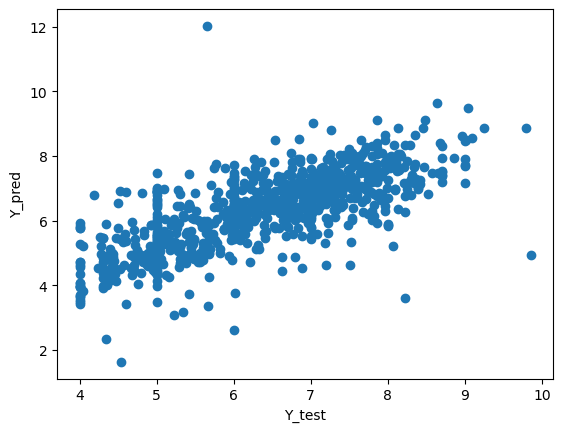

In [37]:
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
# plt.xlim(0, 10000)
# plt.ylim(-10000, 80000)

In [38]:
print(Y_pred_test)

[[ 9.650088 ]
 [ 5.878749 ]
 [ 6.300389 ]
 [ 5.5831633]
 [ 6.8389497]
 [ 5.585847 ]
 [ 6.5284014]
 [ 7.5263414]
 [ 6.466572 ]
 [ 5.802366 ]
 [ 6.8149586]
 [ 7.1309333]
 [ 7.00973  ]
 [ 5.0613985]
 [ 6.2645082]
 [ 5.1075444]
 [ 6.5972977]
 [ 7.410395 ]
 [ 6.439142 ]
 [ 6.9248443]
 [ 5.201842 ]
 [ 6.1133885]
 [ 5.8320417]
 [ 7.5835686]
 [ 6.9409075]
 [ 7.202664 ]
 [ 4.930404 ]
 [ 5.9071317]
 [ 8.332954 ]
 [ 5.8562684]
 [ 6.578271 ]
 [ 7.154128 ]
 [ 5.176638 ]
 [ 6.8814154]
 [ 6.876043 ]
 [ 6.4928904]
 [ 6.827245 ]
 [ 7.4229927]
 [ 8.021529 ]
 [ 6.3332767]
 [ 7.3419323]
 [ 6.84942  ]
 [ 6.6740527]
 [ 6.353781 ]
 [ 7.11911  ]
 [ 7.9230146]
 [ 4.9844484]
 [ 6.5925856]
 [ 4.1448164]
 [ 5.888301 ]
 [ 6.6323123]
 [ 7.1053276]
 [ 7.370136 ]
 [ 6.9350843]
 [ 3.701404 ]
 [ 6.63448  ]
 [ 6.9747906]
 [ 5.1236005]
 [ 5.9135504]
 [ 7.184585 ]
 [ 7.0935607]
 [ 4.248628 ]
 [ 4.75854  ]
 [ 7.655759 ]
 [ 7.944693 ]
 [ 7.1347456]
 [ 6.0265584]
 [ 7.142182 ]
 [ 4.7741623]
 [ 8.661586 ]
 [ 6.087033 ]
 [ 4.8

In [27]:
print(Y_test)

1818    8.638272
2       6.397940
8       5.906578
1391    5.159267
955     8.522879
          ...   
2680    7.301030
2600    7.301030
1959    7.737549
2029    7.721246
1947    6.970616
Name: pIC50, Length: 942, dtype: float64


In [57]:
results = pd.DataFrame(columns=cols)
for idx in range(0, len(Y_test)):
    # print(Y_test.index[idx])
    print("chembl_id: ", drug_data_df.loc[Y_test.index[idx], 'molecule_chembl_id'])
    print("Y_test: ", Y_test[Y_test.index[idx]])
    print("Y_test_pred: ", Y_pred_test[idx][0])
    
    cols = ["chembl_id", "Y_test", "Y_test_pred"]
    results.loc[idx, "chembl_id"] = drug_data_df.loc[Y_test.index[idx], 'molecule_chembl_id']
    results.loc[idx, "Y_test"] = Y_test[Y_test.index[idx]]
    results.loc[idx, "Y_test_pred"] = Y_pred_test[idx][0]

chembl_id:  CHEMBL2048788
Y_test:  8.638272163982407
Y_test_pred:  9.650088
chembl_id:  CHEMBL69960
Y_test:  6.3979400086720375
Y_test_pred:  5.878749
chembl_id:  CHEMBL69629
Y_test:  5.906578314837765
Y_test_pred:  6.300389
chembl_id:  CHEMBL590876
Y_test:  5.159266765388193
Y_test_pred:  5.5831633
chembl_id:  CHEMBL402339
Y_test:  8.522878745280337
Y_test_pred:  6.8389497
chembl_id:  CHEMBL1834657
Y_test:  5.0
Y_test_pred:  5.585847
chembl_id:  CHEMBL1080271
Y_test:  5.4156687756324695
Y_test_pred:  6.5284014
chembl_id:  CHEMBL1173655
Y_test:  7.853871964321762
Y_test_pred:  7.5263414
chembl_id:  CHEMBL3895458
Y_test:  6.0
Y_test_pred:  6.466572
chembl_id:  CHEMBL1928948
Y_test:  6.707743928643524
Y_test_pred:  5.802366
chembl_id:  CHEMBL481324
Y_test:  7.022276394711152
Y_test_pred:  6.8149586
chembl_id:  CHEMBL452717
Y_test:  7.229147988357855
Y_test_pred:  7.1309333
chembl_id:  CHEMBL3919051
Y_test:  7.301029995663981
Y_test_pred:  7.00973
chembl_id:  CHEMBL592708
Y_test:  5.03763

chembl_id:  CHEMBL281006
Y_test:  7.013228265733755
Y_test_pred:  6.2303553
chembl_id:  CHEMBL1256432
Y_test:  7.795880017344075
Y_test_pred:  6.035839
chembl_id:  CHEMBL3325478
Y_test:  5.3872161432802645
Y_test_pred:  5.660786
chembl_id:  CHEMBL3961740
Y_test:  7.0
Y_test_pred:  6.875691
chembl_id:  CHEMBL461114
Y_test:  6.110138278741812
Y_test_pred:  5.610727
chembl_id:  CHEMBL436511
Y_test:  8.698970004336019
Y_test_pred:  8.310774
chembl_id:  CHEMBL359630
Y_test:  7.161150909262744
Y_test_pred:  6.776258
chembl_id:  CHEMBL3924442
Y_test:  6.0
Y_test_pred:  6.504412
chembl_id:  CHEMBL458098
Y_test:  8.096910013008056
Y_test_pred:  7.728532
chembl_id:  CHEMBL1256433
Y_test:  7.5376020021010435
Y_test_pred:  6.0712028
chembl_id:  CHEMBL5178703
Y_test:  9.2518119729938
Y_test_pred:  8.854872
chembl_id:  CHEMBL175557
Y_test:  7.5376020021010435
Y_test_pred:  6.0101595
chembl_id:  CHEMBL1256426
Y_test:  7.2076083105017466
Y_test_pred:  7.100158
chembl_id:  CHEMBL140561
Y_test:  6.95860

In [59]:
results.sort_values(by=['Y_test_pred'], ascending=False)

,chembl_id,Y_test,Y_test_pred
380,CHEMBL2221249,5.65228,12.02165
0,CHEMBL2048788,8.638272,9.650088
129,CHEMBL2048911,9.036212,9.49208
590,CHEMBL4757450,7.853872,9.124619
765,CHEMBL2048908,8.481486,9.123394
...,...,...,...
80,CHEMBL1161236,5.34,3.16782
866,CHEMBL459729,5.221849,3.097231
330,CHEMBL601719,6.0,2.628134
729,CHEMBL14326,4.346787,2.336897
